In [37]:
import geopandas as gpd
import pandas as pd
import osgeo as osg
import numpy as np
import matplotlib.pyplot as plt
from osgeo import ogr
import os
import pyproj
import datetime
import cartopy.crs as ccrs
import scipy

In [38]:
#!pip install cartopy
#!pip install scipy
# !pip install contextily

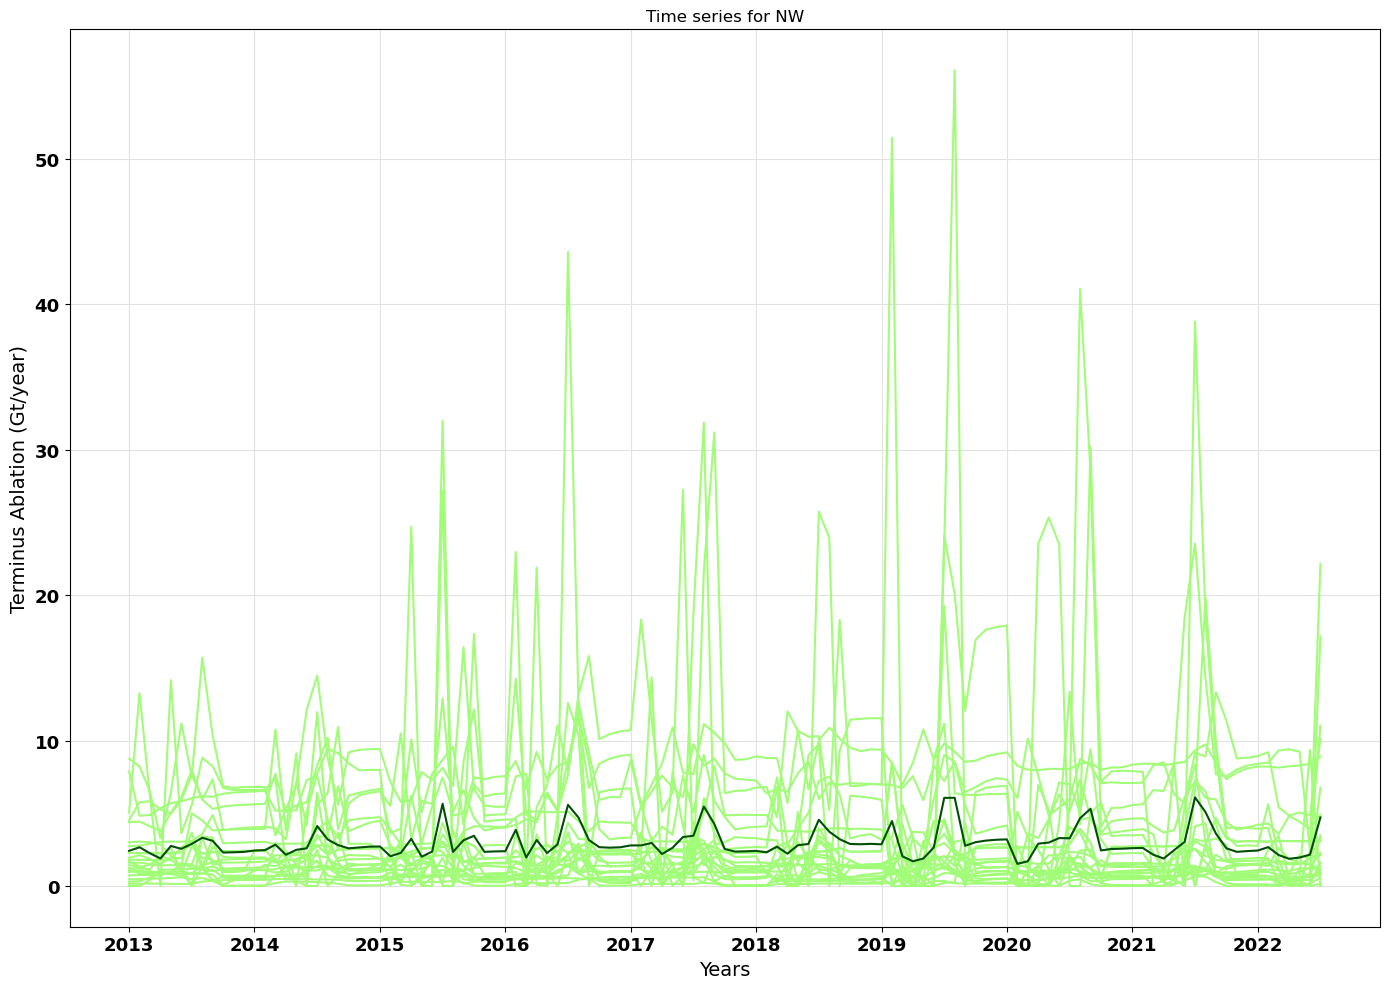

In [39]:
"""
CE = #00B1D8
CE_light = #B7FCFF
SE = #7900FF
SE_light = #E7D6FA
SW = #FF8403
SW_light = #F9DBBB
CW = #ff41d6
CW_light = #FFB8BF
NW = #014E05
NW_light = #A1FC77
NE = #848484
"""
root_path = '/Users/amankc/Terminus_Ablation/';
wild_card = '_NW';
region = 'NW';

if region == 'CE':
    color_code1 = '#B7FCFF'; # This is the light color
    color_code2  = '#00B1D8';
elif region == 'SE':
    color_code1 = '#E7D6FA'; # This is the light color
    color_code2  = '#7900FF';
elif region == 'SW':
    color_code1 = '#F9DBBB'; # This is the light color
    color_code2  = '#FF8403';
elif region == 'CW':
    color_code1 = '#FFB8BF'; # This is the light color
    color_code2  = '#ff41d6';
elif region == 'NW':
    color_code1 = '#A1FC77'; # This is the light color
    color_code2  = '#014E05';
else:
    color_code1 = '#848484'; # This is the light color
    color_code2  = '#848484';

import glob
directory_path = root_path + 'Results/Output/Term_Ablation_Latest/'
file_pattern = 'Term_Ablation_latest_updated_*' + region +'*.csv'  # Replace this with your desired file pattern

# Use glob to find files matching the pattern in the directory
matching_files = glob.glob(directory_path + file_pattern)

csv_file = [];
for file in matching_files:
    csv_file.append(pd.read_csv(file))

term_ablation2 = [];
discharge = [];
date_axis = [];
l = [];
for i in range(len(csv_file)):
    l.append(len(csv_file[i]));
len_max = np.min(l)
min_idx = pd.Series(l).idxmin()
#just to make the length of vectors equal   
for date in csv_file[min_idx].dates:
    date_axis.append(date)
for i in range(len(csv_file)):
    j = 0;
    term_ablation2.append([])# Initialize an empty list for each index in term_ablation2
    discharge.append([])
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2[i].append(csv_file[i].term_abl_year[j])
        discharge[i].append(csv_file[i].discharge[j])
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;
mean_term_abl = [];
mean_discharge = [];
for i in range(len(term_ablation2[0])):
    counter = 0;
    sum_term_abl = 0;
    sum_discharge  = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2[j][i]
        sum_discharge = sum_discharge + discharge[j][i]
        counter += 1;
    mean_term_abl.append(sum_term_abl/counter);
    mean_discharge.append(sum_discharge/counter);
# fig,ax = plt.subplots()
plt.figure(figsize=(14,10)) 
ax = plt.plot(term_ablation2[0], color = color_code1)
#ax = plt.plot(date_axis, term_ablation2[0], color = color_code1) # Run this with the X axis 
for i in range(len(term_ablation2)):
    plt.plot(term_ablation2[i], color = color_code1)
plt.plot(date_axis,mean_term_abl, color = color_code2)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Terminus Ablation (Gt/year)',fontsize = 14)
plt.title('Time series for ' + region)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;a=[];
interval = 12;
dates_ticks = [];
dates_label = [];
# extra_dates = ['17-Aug-2022','16-Sep-2022','17-Oct-2022','16-Nov-2022','17-Dec-2022','17-Jan-2023','15-Feb-2023','17-Mar-2023']

# for date in extra_dates:
#     date_axis.append(date)
for date in date_axis:
    a.append(xz%interval)
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])     
    xz+=1
    # if xz == len(date_axis) and len(dates_ticks) == 10:
    #     dates_ticks.append('17-Jan-2023')
    #     dates_label.append('2023')
    


ax = plt.gca()
# ax.set_xlim(['17-Jan-2012', '17-Mar-2024'])
# if len(dates_ticks) == 10:
#     dates_ticks.append('17-Jan-2023')
#     dates_label.append('2023')    
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
# plt.xlim(date_axis[0], '01-Jul-2022')
plt.yticks(fontsize = 13,weight='bold');
plt.tight_layout()
plt.grid('on',color = '#E4E1E1')
# root_path + 'Results/Output/'
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)

In [40]:
matching_files

['/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Innaqqissorsuup_Oqquani_Sermeq_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Sermeq_Avanarleq_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Tuttulipaluup_Sermia_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Qaqujaarsuup_Sermia_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Nordenskiold_Gletsjer_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Sermersuaq_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_Tuttulikassaap_Sermia_NW.csv',
 '/Users/amankc/Terminus_Ablation/Results/Output/Term_Ablation_Latest/Term_Ablation_latest_updated_N

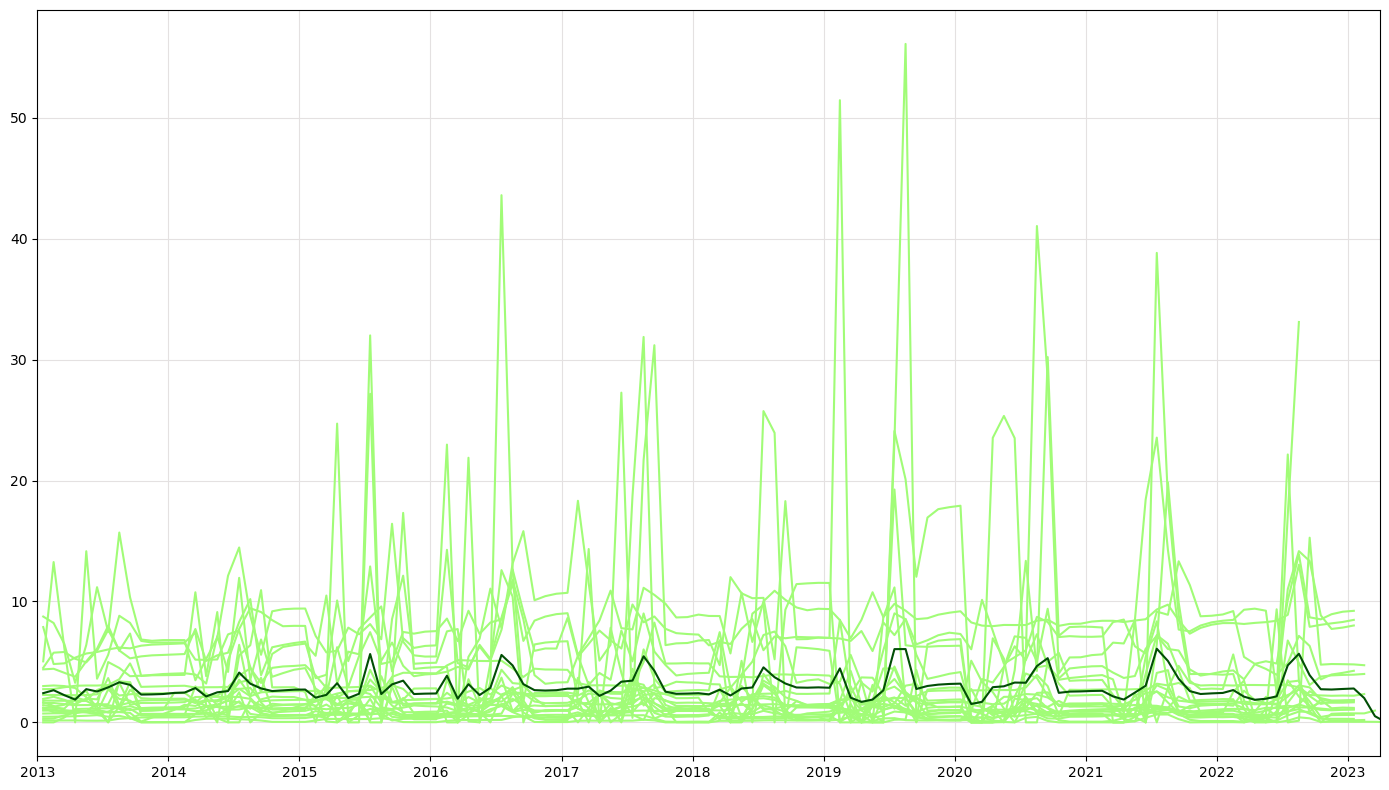

In [41]:
csvs_df = pd.DataFrame()
for i, file in enumerate(matching_files):
    df = pd.read_csv(file)
    df['site_number'] = i
    csvs_df = pd.concat([csvs_df, df])
csvs_df.reset_index(drop=True, inplace=True)
# convert dates to pandas.datetime
csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])

# grab unique dates
unique_dates = csvs_df['dates'].drop_duplicates()
discharge_mean = [csvs_df.loc[csvs_df['dates']==date]['discharge'].mean() for date in unique_dates]
term_ablation_mean = [csvs_df.loc[csvs_df['dates']==date]['term_abl_year'].mean() for date in unique_dates]

# plot means
plt.figure(figsize=(14,8)) 
unique_sites = csvs_df['site_number'].drop_duplicates().values
for site in unique_sites:
    csv_site = csvs_df.loc[csvs_df['site_number']==site]
    plt.plot(csv_site['dates'], csv_site['term_abl_year'], color = color_code1)
plt.plot(unique_dates, term_ablation_mean,color=color_code2, label='mean')
plt.grid()
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()
plt.show()

In [42]:
# csvs_df = pd.DataFrame()
# for i, file in enumerate(matching_files):
#     df = pd.read_csv(file)
#     df['site_number'] = i
#     csvs_df = pd.concat([csvs_df, df])
# csvs_df.reset_index(drop=True, inplace=True)
# # convert dates to pandas.datetime
# csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])

# # grab unique dates
# unique_dates = csvs_df['dates'].drop_duplicates()
# discharge_mean = [csvs_df.loc[csvs_df['dates']==date]['discharge'].mean() for date in unique_dates]
# term_ablation_mean = [csvs_df.loc[csvs_df['dates']==date]['term_abl_year'].mean() for date in unique_dates]

# # plot means
# plt.figure(figsize=(14,6)) 
# unique_sites = csvs_df['site_number'].drop_duplicates().values
# for site in unique_sites:
#     csv_site = csvs_df.loc[csvs_df['site_number']==site]
#     plt.plot(csv_site['dates'], csv_site['term_abl_year'], color = color_code1)
# plt.plot(unique_dates, term_ablation_mean,color=color_code2, label='mean')
# plt.grid()
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
# plt.grid('on',color = '#E4E1E1')
# plt.show()

In [43]:
type(term_ablation_mean)

list

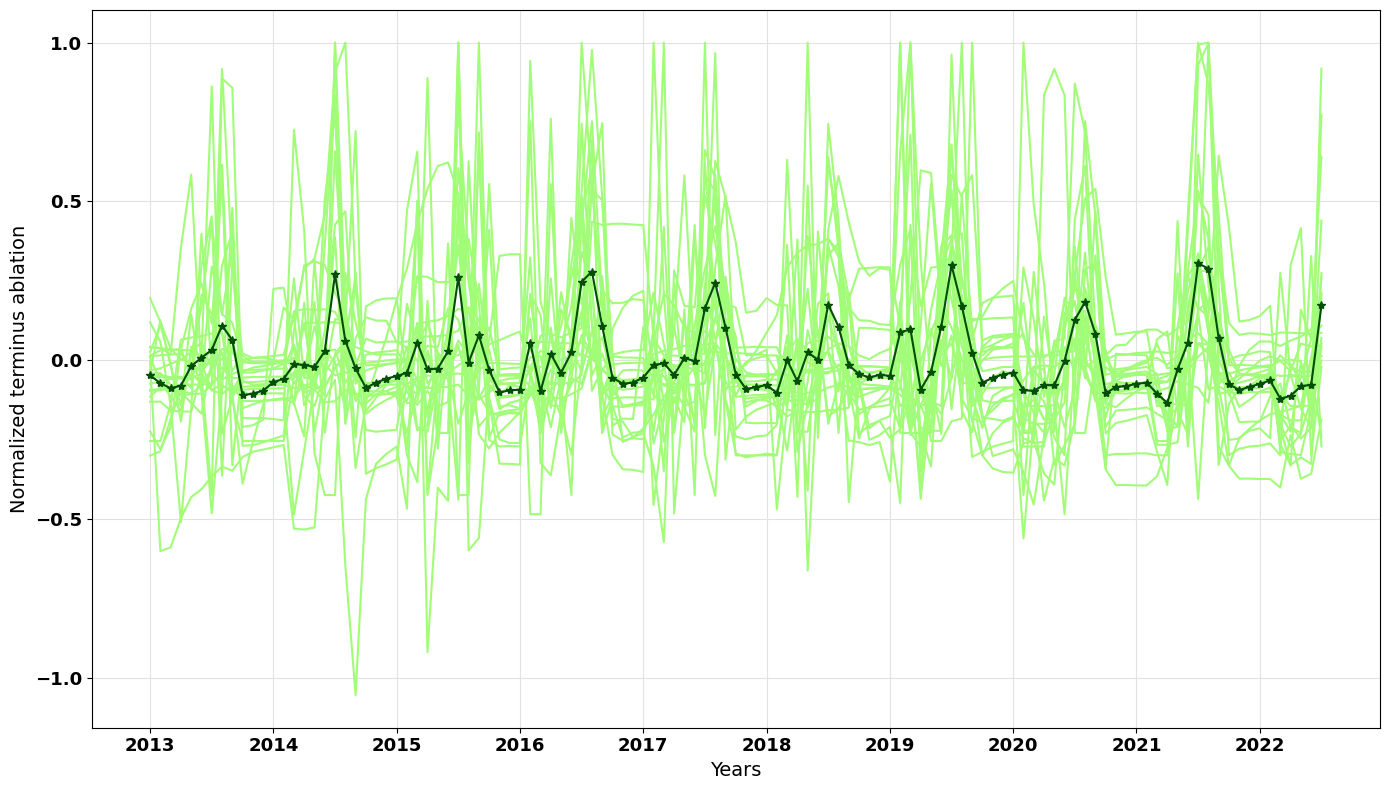

In [44]:
# Normailze the figure
term_ablation2_normalized = [];
discharge_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
        discharge_normalized[i].append((csv_file[i].discharge[j]-mean_value_dis)/max_value_dis)
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl/counter);
    mean_discharge_normalized.append(discharge_sum/counter);
# fig,ax = plt.subplots()
plt.figure(figsize=(14,8)) 
# ax = plt.plot(term_ablation2_normalized[0], color = color_code1)
#ax = plt.plot(date_axis, term_ablation2[0], color = color_code1) # Run this with the X axis 
for i in range(len(term_ablation2_normalized)):
    plt.plot(date_axis,term_ablation2_normalized[i], color = color_code1)
plt.plot(date_axis,mean_term_abl_normalized,marker='*',color = color_code2)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized terminus ablation',fontsize = 14)
# plt.title('Normalized Time series for ' + region)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;

interval = 12;
dates_ticks = [];
dates_label = [];
for date in date_axis:
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])
    xz+=1
    
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
plt.yticks(fontsize = 13,weight='bold');
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300)
# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')


In [45]:
# discharge_normalized

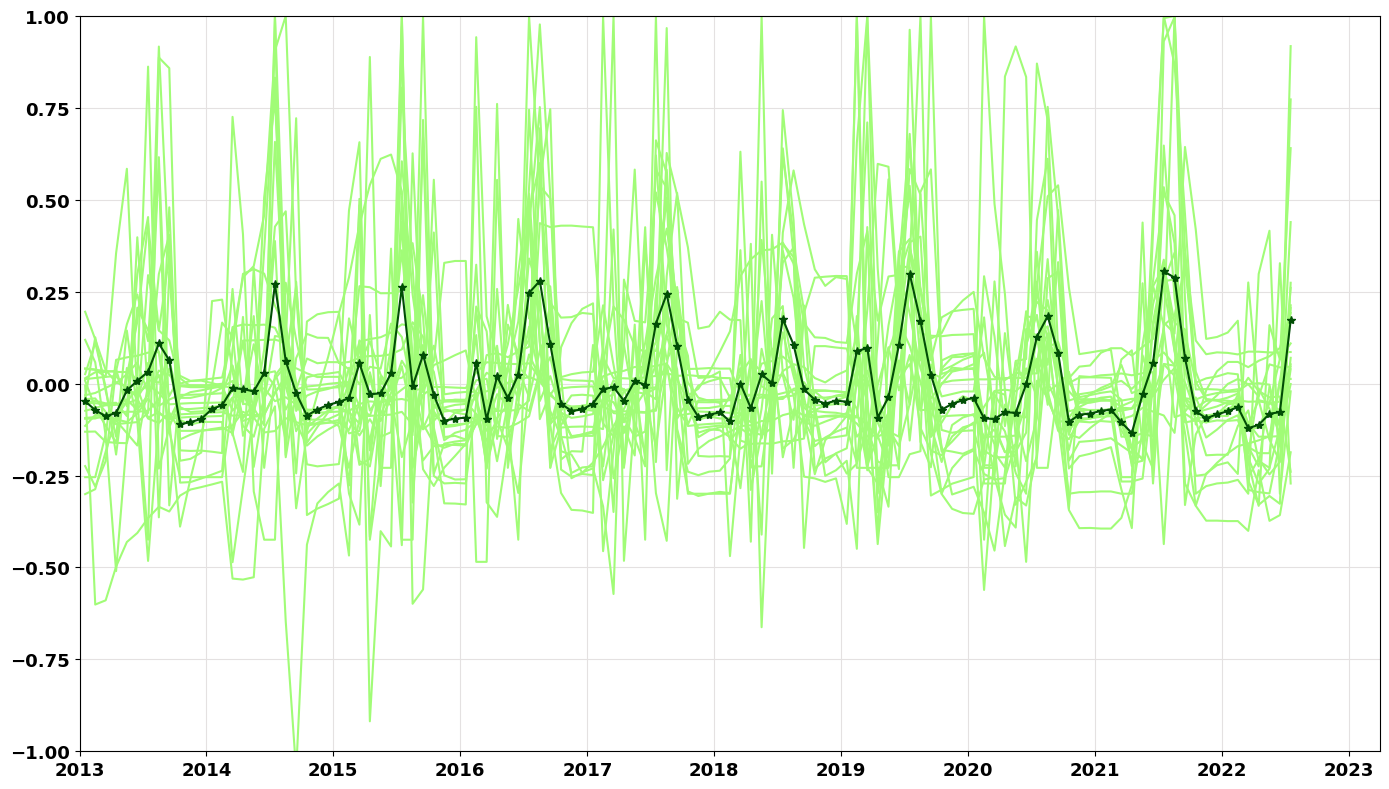

In [46]:
# my_array = np.array(my_list)
# df = pd.DataFrame(my_array, columns=['Column1'])
# date_axis,
# date_axis,mean_term_abl_normalized
date_array = np.array(date_axis)
mean_ta_array = np.array(mean_term_abl_normalized)
term_abl_df = pd.DataFrame({'date': date_array,'mean_ta_normalized': mean_ta_array})
# for i in range(len(term_ablation2_normalized)):
#     term_abl_array[i] = np.array(term_ablation2_normalized[0])
plt.figure(figsize=(14,8)) 
term_abl_df['date'] = pd.to_datetime(term_abl_df['date'])
for i in range(len(term_ablation2_normalized)):
    plt.plot(term_abl_df['date'],term_ablation2_normalized[i], color = color_code1)
plt.plot(term_abl_df['date'], term_abl_df['mean_ta_normalized'],marker='*',color=color_code2)
plt.grid()
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.ylim(-1,1)
plt.xticks(visible=True,fontsize = 13,weight='bold')
plt.yticks(visible=True,fontsize = 13,weight='bold')
# plt.yticks(visible=False,fontsize = 13,weight='bold')
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_updated_TA_' + region +'.png',dpi=300)
plt.show()

In [47]:
# mean_term_abl_normalized

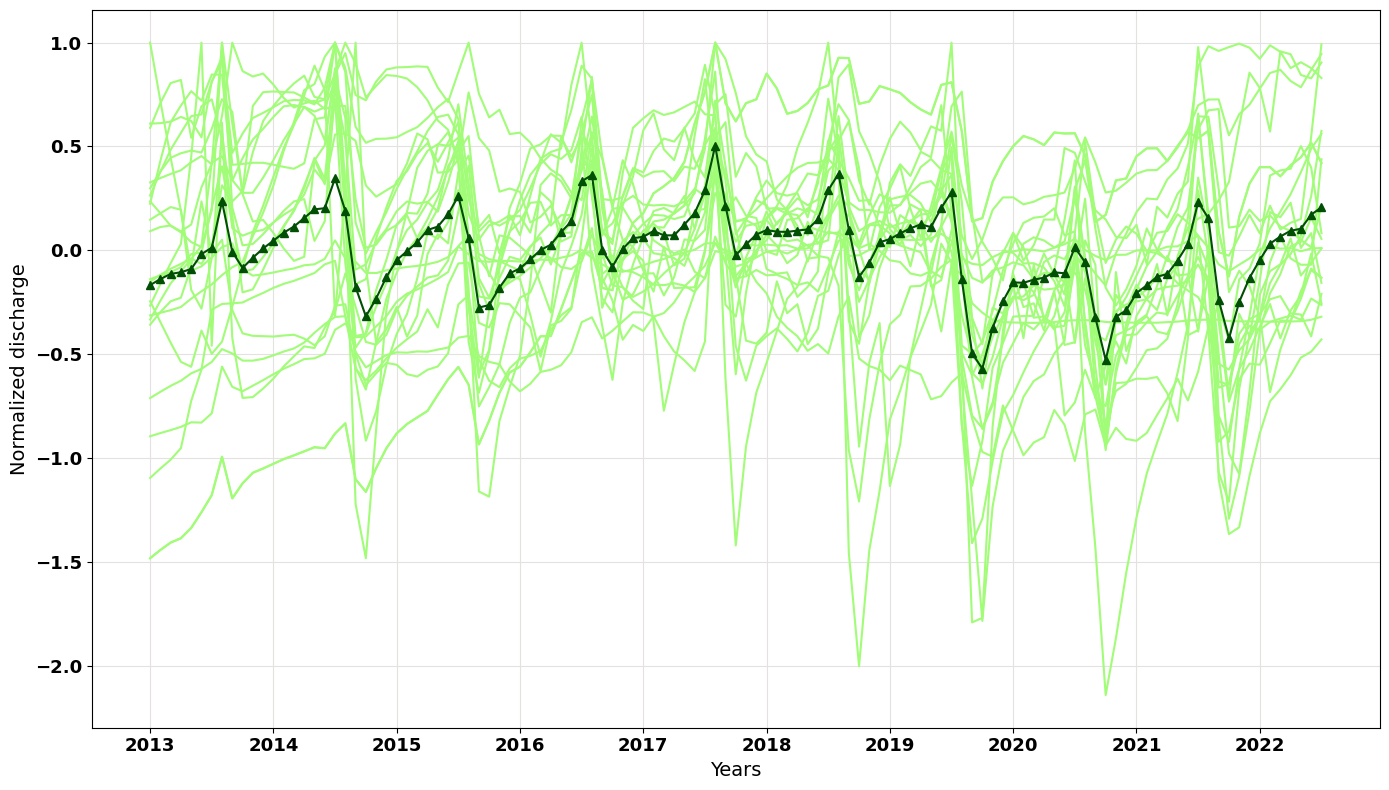

In [48]:
plt.figure(figsize=(14,8)) 
# ax = plt.plot(discharge_normalized[0], color = color_code1)
#ax = plt.plot(date_axis, term_ablation2[0], color = color_code1) # Run this with the X axis 
for i in range(len(discharge_normalized)):
    plt.plot(date_axis,discharge_normalized[i], color = color_code1)
plt.plot(date_axis,mean_discharge_normalized,marker='^',color = color_code2)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized discharge',fontsize = 14)
# plt.title('Normalized Discharge Time series for ' + region)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;
interval = 12;
dates_ticks = [];
dates_label = [];
for date in date_axis:
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])
    xz+=1
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
plt.yticks(fontsize = 13,weight='bold')
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Discharge_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)


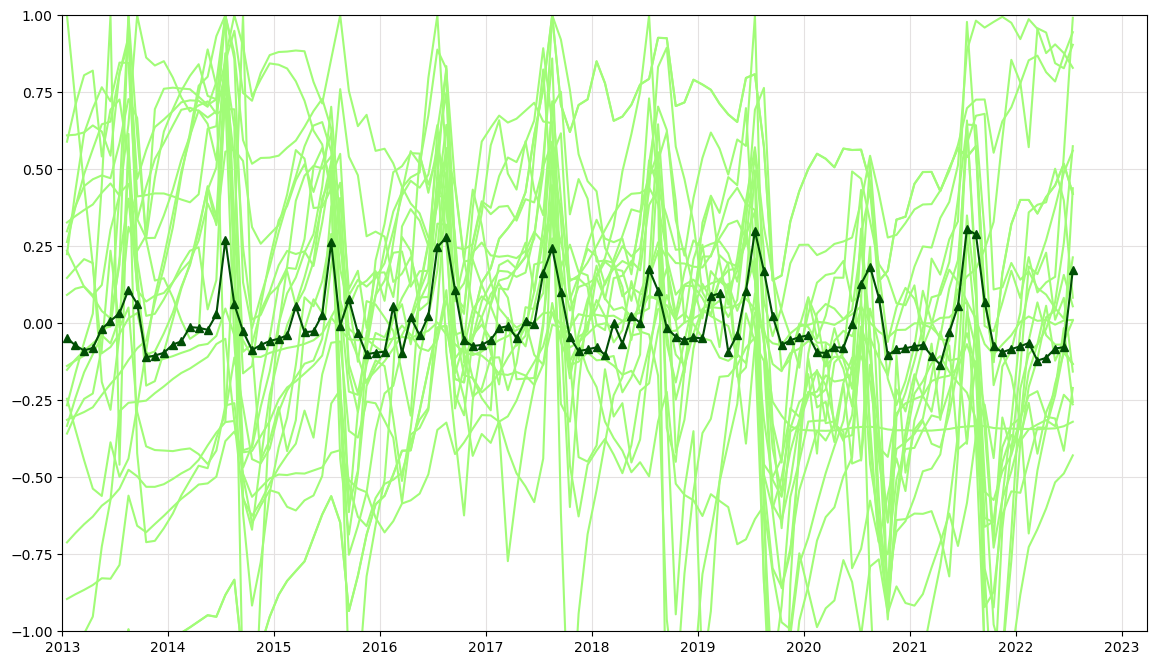

In [49]:
date_array = np.array(date_axis)
mean_dis_array = np.array(mean_discharge_normalized)
dis_df = pd.DataFrame({'date': date_array,'mean_dis_normalized': mean_discharge_normalized})
plt.figure(figsize=(14,8)) 
for i in range(len(term_ablation2_normalized)):
    plt.plot(term_abl_df['date'],discharge_normalized[i], color = color_code1)
plt.plot(term_abl_df['date'], term_abl_df['mean_ta_normalized'],marker='^',color=color_code2)
plt.grid()
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.ylim(-1,1)
plt.xticks(visible=True)
plt.yticks(visible=True)
plt.grid('on',color = '#E4E1E1')
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_updated_Discharge_' + region +'.png',dpi=300)
plt.show()

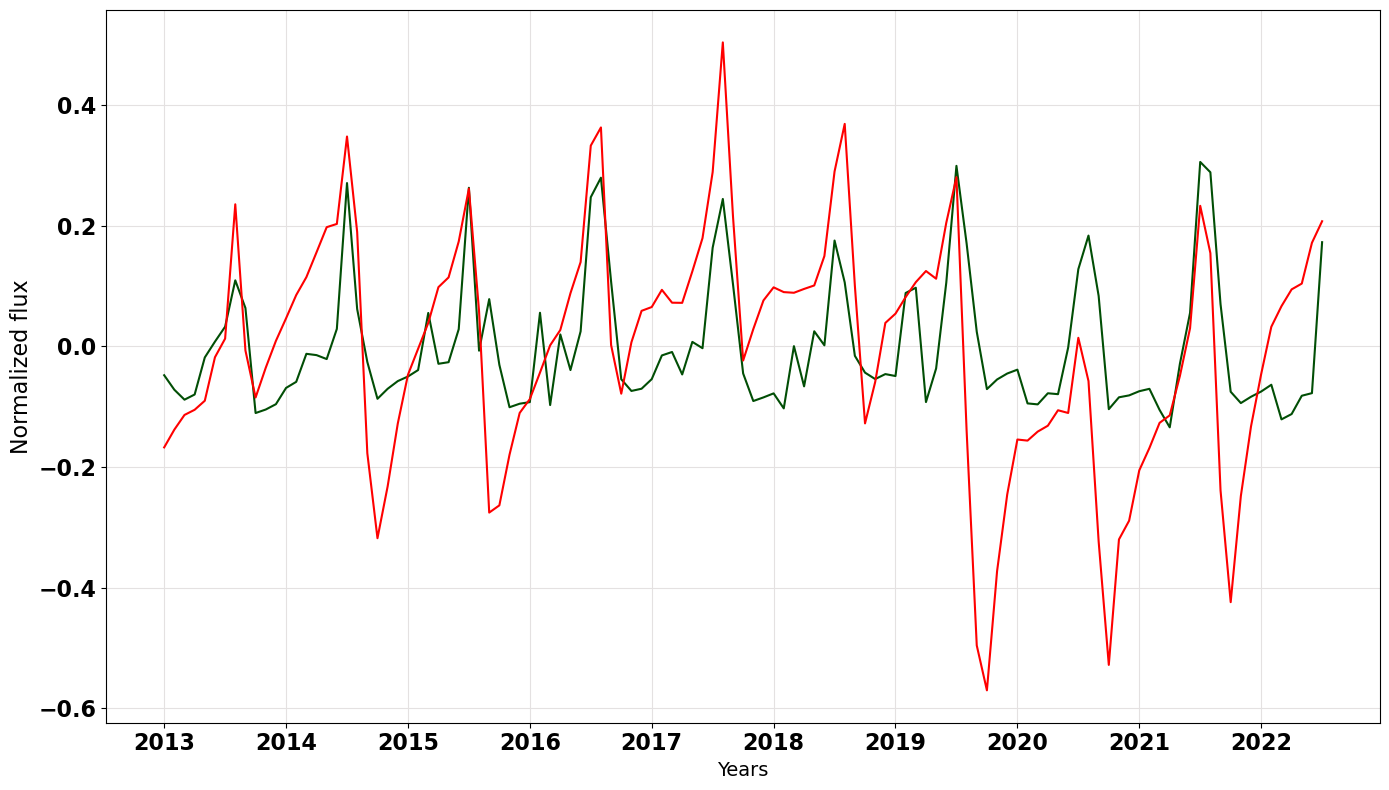

In [50]:
# Plotting normalized ablation and discharge on the same figure

term_abl_color = color_code2
discharge_color = '#ff0000ff'
plt.figure(figsize=(14,8)) 

plt.plot(date_axis,mean_term_abl_normalized, color = term_abl_color)
plt.plot(date_axis,mean_discharge_normalized, color = discharge_color)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized flux',fontsize = 16)
# plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
# have the same length of x axis 
plt.xticks(dates_ticks,dates_label,fontsize = 16,weight = 'bold')
plt.yticks(fontsize = 16,weight = 'bold')
plt.grid('on',color = '#E4E1E1')
plt.tight_layout()

plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_Discharge_ablation ' + region +'.png',dpi=300)

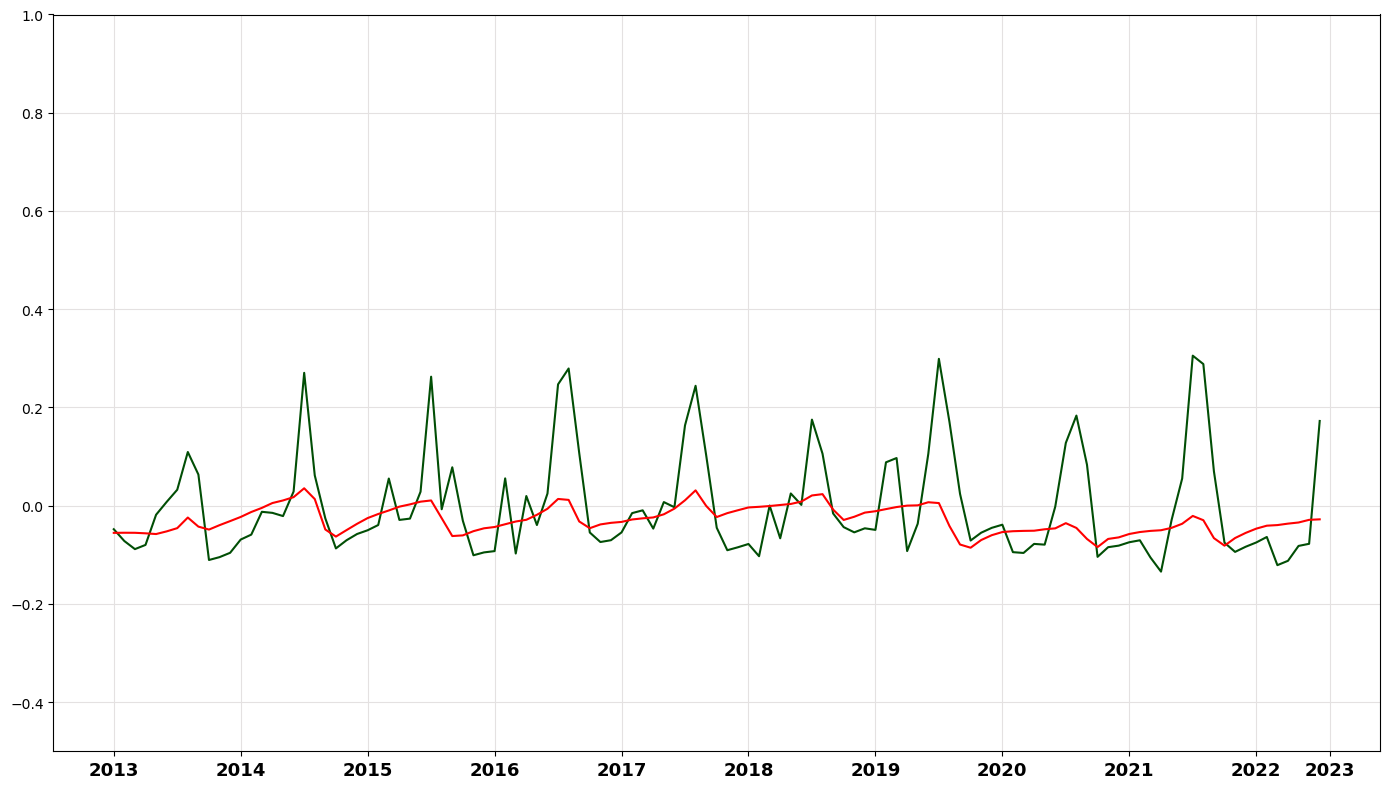

In [51]:
# Normailze the figure
term_ablation2_normalized = [];
discharge2_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge2_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
        discharge2_normalized[i].append((csv_file[i].discharge[j]-mean_value)/max_value)
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized2 = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge2_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl/counter);
    mean_discharge_normalized2.append(discharge_sum/counter);

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
# mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')

term_abl_color = color_code2
discharge_color = '#ff0000ff'
plt.figure(figsize=(14,8)) 

plt.plot(date_axis,mean_term_abl_normalized, color = term_abl_color)
plt.plot(date_axis,mean_discharge_normalized2, color = discharge_color)
# plt.xlabel('Years',fontsize = 14)
# plt.ylabel('Normalized flux',fontsize = 14)
# plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
dates_ticks2 = dates_ticks;
if len(dates_ticks) == 10:
    dates_ticks2.append('17-Jan-2023')
    dates_label.append('2023')                     
plt.xticks(dates_ticks2,dates_label,fontsize = 13,weight = 'bold')
# plt.yticks(fontsize = 13,weight = 'bold')
plt.grid('on',color = '#E4E1E1')
ax = plt.gca()
ax.set_ylim([-0.5, 1])
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_by_ablation_test ' + region +'.png',dpi=300)

In [52]:
# mean_discharge_normalized2

In [53]:
term_abl_color = color_code2
discharge_color = '#ff0000ff'

mean_norm_array = np.array(date_axis)
mean_dis_array = np.array(mean_discharge_normalized2)
dis_df = pd.DataFrame({'date': date_array,'mean_dis_normalized': mean_discharge_normalized})
# plt.plot(term_abl_df['date'], term_abl_df['mean_ta_normalized'],marker='^',color=color_code2)
# plt.grid()
# plt.figure(figsize=(14,8)) 
# plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
# plt.ylim(-0.45,1)
# plt.plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
# plt.plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
# plt.grid('on',color = '#E4E1E1')
# plt.xticks(visible=True, fontsize = 13,weight='bold')
# plt.yticks(visible=True,fontsize = 13,weight='bold')
# plt.tight_layout()
# plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Normalized_by_ablation_updated ' + region +'.png',dpi=300)

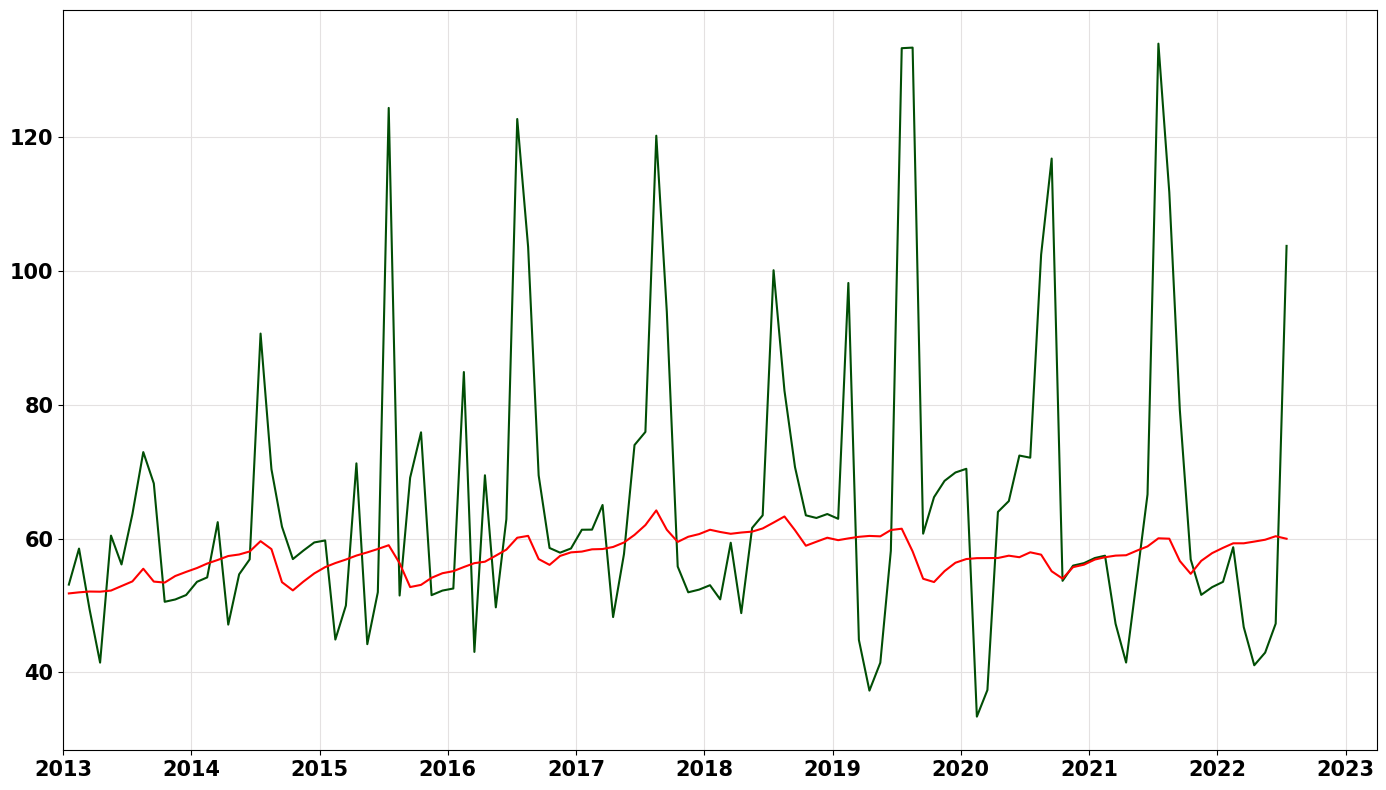

In [54]:
# Getting the total sum for both
term_ablation2_normalized = [];
discharge2_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge2_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
        discharge2_normalized[i].append(csv_file[i].discharge[j])
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized2 = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge2_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl);
    mean_discharge_normalized2.append(discharge_sum);

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
# mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')

term_abl_color = color_code2
discharge_color = '#ff0000ff'
plt.figure(figsize=(14,8)) 

plt.plot(term_abl_df['date'],mean_term_abl_normalized, color = term_abl_color)
plt.plot(term_abl_df['date'],mean_discharge_normalized2, color = discharge_color)
# plt.xlabel('Years',fontsize = 14)
# plt.ylabel('Normalized flux',fontsize = 14)
# plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
dates_ticks2 = dates_ticks;
# if len(dates_ticks) == 10:
#     dates_ticks2.append('17-Jan-2023')
#     dates_label.append('2023') 
plt.xlim(np.datetime64('2013-01-01'), np.datetime64('2023-03-31'))
plt.xticks(fontsize = 15,weight = 'bold')
plt.yticks(fontsize = 15,weight = 'bold')
plt.grid('on',color = '#E4E1E1')
ax = plt.gca()
# ax.set_ylim([-0.5, 1])
plt.tight_layout()
plt.savefig(root_path + 'Results/Images/Updated_Regional_Figures/'+'Ice_flux_Updated ' + region +'.png',dpi=300)

In [55]:
print(np.sum(mean_term_abl_normalized))
print(np.sum(mean_discharge_normalized2))

7461.652882027438
6617.044976006847


/var/folders/kn/6f5gmt395k751v7ndm_mzq180000gq/T/ipykernel_72426/1227823164.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=115).
  frequencies, times, Sxx = plt.specgram(months, NFFT=None,Fs=1)


ValueError: too many values to unpack (expected 3)

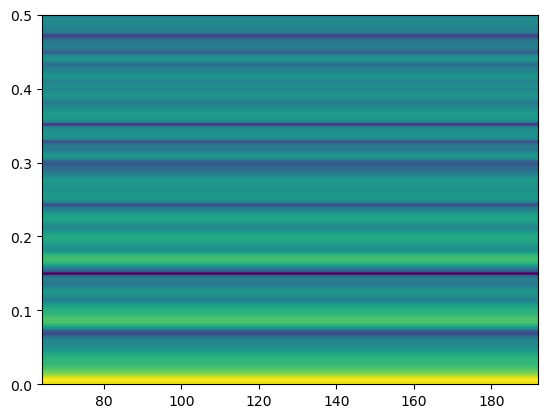

In [56]:
months = mean_term_abl_normalized 

# Compute the spectrogram
frequencies, times, Sxx = plt.specgram(months, NFFT=None,Fs=1)

# Plot the spectrogram without log scale
# plt.pcolormesh(times, frequencies, Sxx)
plt.ylabel('Frequency [cycles/month]')
plt.xlabel('Time [months]')
plt.title('Spectrogram of Monthly Ablation for region')
plt.colorbar(label='Intensity')

plt.show()

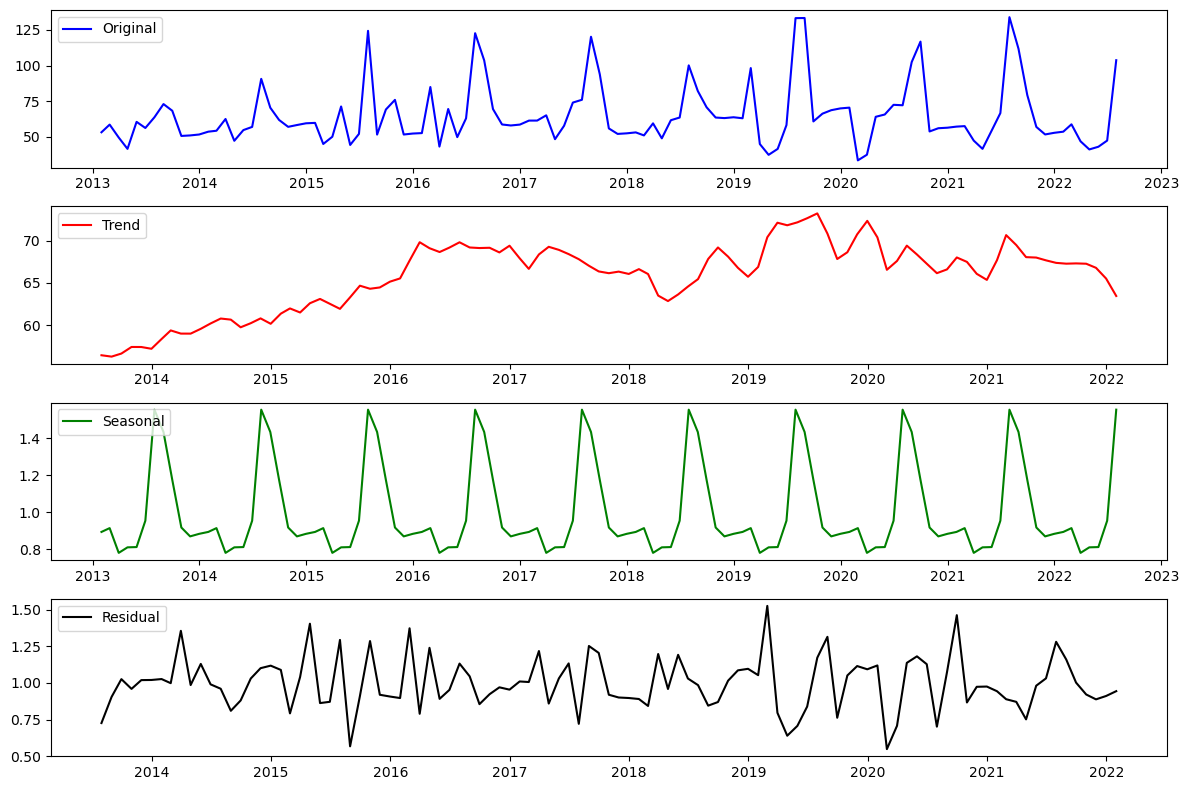

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'months' is a list of monthly time series data (replace it with your data)
months = mean_term_abl_normalized

# Create a pandas Series with a datetime index
date_index = pd.date_range(start='2013-01-15', periods=len(months), freq='M')
time_series = pd.Series(months, index=date_index)

# Seasonal decomposition using STL
result = seasonal_decompose(time_series, model='multiplicative')

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, 'b',label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, 'r',label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, 'g',label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, 'k',label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

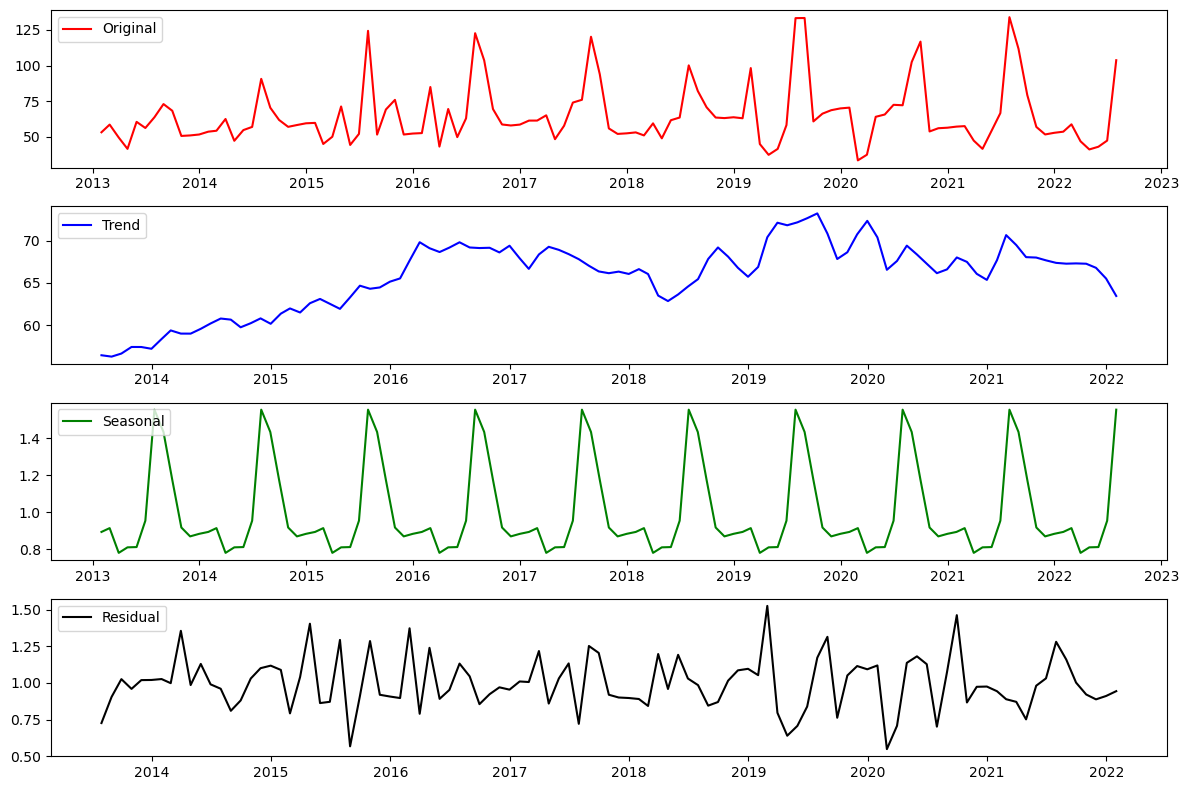

In [58]:
# !pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'months' is a list of monthly time series data (replace it with your data)
months = mean_term_abl_normalized 

# Create a pandas Series with a datetime index
date_index = pd.date_range(start='2013-01-15', periods=len(months), freq='M')
time_series = pd.Series(months, index=date_index)

# Seasonal decomposition using STL
result = seasonal_decompose(time_series, model='multiplicative')

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(time_series, 'r',label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, 'b',label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, 'g',label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, 'k',label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Sermeq_Avannarleq 12.1 C
Sermeq_Avannarleq 12.1 C
Innaqqissorsuup_Oqquani_Sermeq 4.518518518518518 E
Innaqqissorsuup_Oqquani_Sermeq 4.518518518518518 E
Sermeq_Avanarleq 12.1 C
Sermeq_Avanarleq 12.1 C
Helheim_Gletsjer 12.1 C
Helheim_Gletsjer 12.1 C
Tuttulipaluup_Sermia 12.1 C
Tuttulipaluup_Sermia 12.1 C
Kangerlussuup_Sermia 12.1 C
Kangerlussuup_Sermia 12.1 C
Kangerlussuaq_Gletsjer 12.2 C
Kangerlussuaq_Gletsjer 12.2 C
Qaqujaarsuup_Sermia 5.761904761904762 C
Qaqujaarsuup_Sermia 5.761904761904762 C
Apuseerajik 12.1 C
Apuseerajik 12.1 C
Nordenskiold_Gletsjer 60.5 C
Apusiigajik 12.2 C
Apusiigajik 12.2 C
Zachariae_Isstrom 11.0 C
Zachariae_Isstrom 11.0 C
Sermeq_Kujalleq_N1 12.2 C
Sermeq_Kujalleq_N1 12.2 C
Sermeq_Silarleq 12.2 C
Sermeq_Silarleq 12.2 C
Sermersuaq 3.2702702702702706 E
Sermersuaq 3.2702702702702706 E
Tuttulikassaap_Sermia 12.1 C
Tuttulikassaap_Sermia 12.1 C
Nansen_Gletsjer 6.05 E
Sermeq_Kujalleq_N3 12.1 C
Sermeq_Kujalleq_N3 12.1 C
Sermilik 12.1 C
Sermilik 12.1 C
Ikissuup_Sermersua

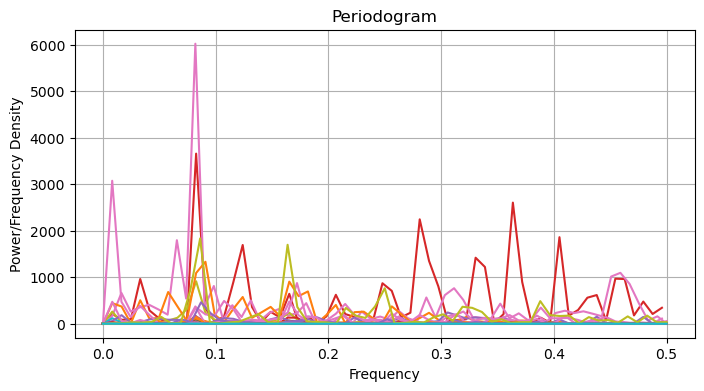

In [64]:
def func_periodogram(file):
    '''Function to calculate the periodic power of the terminus ablation time series'''
    # time_series = pd.read_csv(file)
    # ta = time_series.term_abl_year;
    # n = len(ta)
    # ext = n+1
    # f = np.arange(1,ext) / n
    # FF = np.abs(np.fft.fft(ta)) / np.sqrt(n)**2
    # max_index = np.argmax(FF)
    # max_freq = 1/f[max_index]
    # return max_freq
    # time_series = pd.read_csv(file)
    # ta = time_series['term_abl_year'].values  # Get the values as a NumPy array
    
    # n = len(ta)
    
    # # Calculate the frequencies
    # f = np.arange(n) / n
    
    # # Initialize the periodogram array
    # periodogram = np.zeros(n)
    
    # # Compute the periodogram manually
    # for k in range(n):
    #     exponents = np.exp(-2j * np.pi * k * f)
    #     periodogram[k] = np.abs(np.dot(ta, exponents))**2


    
    time_series = pd.read_csv(file)
    ta = time_series.term_abl_year  # Get the values as a NumPy array

    # Calculate the periodogram using scipy's periodogram function
    frequencies, periodogram_values = scipy.signal.periodogram(ta)
    return frequencies, periodogram_values

latitude = None
longitude = None
glaciers = pd.read_csv('/Users/amankc/Library/CloudStorage/GoogleDrive-amankc929@gmail.com/My Drive/Terminus/Glacier_Data/Glacier_names.csv')
period_df = pd.DataFrame(columns=['glacier','region','frequency','periodogram_values','lat','lon'])
add_path = 'Results/Output/Term_Ablation_Latest/'
directory_path2 = root_path + add_path
file_pattern2 = 'Term_Ablation_latest_updated_*' +'*.csv' 
# Use glob to find files matching the pattern in the directory
row_list = []
matching_file = glob.glob(directory_path2 + file_pattern2)
fig,ax = plt.subplots(figsize=(8, 4))
for file in matching_file:
    glac_name = file[97:-7]
    for i in range(len(glaciers)):
        if glac_name == glaciers.Official_n[i]:
            # print(glac_name)
            latitude = glaciers.LAT[i]
            longitude = glaciers.LON[i]
    frequencies, periodogram_values = func_periodogram(file)
    max_index = np.argmax(periodogram_values)
    max_freq = 1/frequencies[max_index]
    if max_freq >10 and max_freq < 13 or max_freq >5 and max_freq < 7:
    # if max_freq >10 and max_freq < 13 or max_freq >5.5 and max_freq < 6.5:
        cycle = 'C'; annual = 'N'
        print(glac_name,max_freq,cycle)
    elif max_freq <9:
        cycle = 'E'; annual = 'N'
        print(glac_name,max_freq,cycle)
    else:
        periodogram_values_list = periodogram_values.tolist()
        frequencies_list = frequencies.tolist()
        sorted_freq = np.sort(periodogram_values_list) #.index only works with list
        second_largest = sorted_freq[-2]
        second_largest_index = periodogram_values_list.index(second_largest)
        max_freq =  1/frequencies[second_largest_index]
        annual = 'Y'
        if max_freq <9:
            cycle = 'E';
        elif max_freq >9 and max_freq < 13:
            cycle = 'C'; 

    print(glac_name,max_freq,cycle)

    new_row = {'glacier': file[97:-7],
               'region': file[-6:-4],
               'frequency': max_freq,
               'lat': latitude,# Add latitude value if available
               'lon': longitude,
               'seasonality':cycle,'long-term interannuual':annual}  # Add longitude value if available
    
    # # Append the new row to period_df
    row_list.append(new_row)
    period_df = pd.DataFrame(row_list)
    ax.plot(frequencies, periodogram_values)
    ax.set_title('Periodogram')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Power/Frequency Density')
    ax.grid(True)

    

plt.show()
#     new_row = {'glacier': file[89:-7],
#                'region': file[-6:-4],
#                'frequency': periodogram(file),
#                'lat': latitude,  # Add latitude value if available
#                'lon': longitude}  # Add longitude value if available
    
#     # Append the new row to period_df
#     row_list.append(new_row)
# period_df = pd.DataFrame(row_list)
# plt.plot(f, P)
# plt.xlabel('Frequency')
# plt.ylabel('Power')
# plt.title('Periodogram')
# plt.show()


# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(1, 1, 1, projection=ccrs.NorthPolarStereo(central_longitude=-45))
# for i in range(len(period_df)):
#     ax.plot(period_df.lon[i],period_df.lat[i])
# # Set the extent to focus on Greenland

# ax.set_extent([-90, 90, 60, 90])

# # Draw coastlines
# ax.coastlines(resolution='50m')

# plt.show()


# matching_file

In [61]:
# Sermeq_Avannarleq	
period_df

glacier region  frequency      lat      lon  \
0                Sermeq_Avannarleq     CW  12.100000  70.0853 -50.2468   
1   Innaqqissorsuup_Oqquani_Sermeq     NW   4.518519  76.3833 -62.7665   
2                 Sermeq_Avanarleq     NW  12.100000  73.9410 -55.7679   
3                 Helheim_Gletsjer     SE  12.100000  66.3735 -38.3067   
4             Tuttulipaluup_Sermia     NW  12.100000  77.7000 -66.2330   
5             Kangerlussuup_Sermia     CW  12.100000  71.4588 -51.3101   
6           Kangerlussuaq_Gletsjer     CE  12.200000  68.6746 -33.0760   
7              Qaqujaarsuup_Sermia     NW   5.761905  77.5167 -65.6664   
8                      Apuseerajik     SE  12.100000  66.3820 -37.5439   
9            Nordenskiold_Gletsjer     NW  60.500000  75.8248 -59.0399   
10                     Apusiigajik     CE  12.200000  63.2926 -41.9168   
11               Zachariae_Isstrom     NE  11.000000  78.9333 -21.0000   
12              Sermeq_Kujalleq_N1     CW  12.200000  69.9960 -50.1596   
13                 Sermeq_Silarleq     CW  12.200000  70.8268 -50.7627   
14                      Sermersuaq     NW   3.270270  79.4462 -63.3957   
15           Tuttulikassaap_Sermia     NW  12.100000  74.9618 -57.0355   
16                 Nansen_Gletsjer     NW   6.050000  75.7759 -58.8283   
17              Sermeq_Kujalleq_N3     NW  12.100000  73.8317 -55.5825   
18                        Sermilik     CW  12.100000  70.6333 -50.6167   
19              Ikissuup_Sermersua     NW  12.777778  74.2307 -55.8275   
20           Christian_IV_Gletsjer     CE  12.200000  68.7000 -30.6167   
21      Qeqertaarsuusarsuup_Sermia     NW  12.200000  77.6564 -65.9679   
22             Sermeq_Avannarleq_N     CW   4.461538  70.5454 -50.4896   
23             Kangilernata_Sermia     CW  12.100000  69.9009 -50.3420   
24             Qeqertarsuup_Sermia     NW   6.052632  73.5932 -55.5306   
25                         Rimfaxe     SE  12.200000  63.3050 -42.3669   
26           Kangerluarsuup_Sermia     NW  12.600000  77.6934 -68.5829   
27                   Narsap_Sermia     SW  12.100000  64.6672 -49.8576   
28               Perlerfiup_Sermia     CW  12.888889  70.9909 -50.9227   
29                      Bernstorff     SE  12.100000  63.8846 -41.7654   
30               Saqqarliup_Sermia     CW  11.000000  68.8667 -50.2833   
31              Akullersuup_Sermia     SW  12.200000  64.3833 -49.4779   
32                     Apusiigajik     SE  12.200000  63.2926 -41.9168   
33        Qeqertat_Timaanni_Sermeq     NW   8.642857  76.3000 -61.7666   
34         Yngvar_Nielsen_Gletsjer     NW  11.000000  76.3334 -64.0831   
35                    Ullip_Sermia     NW  12.200000  76.5797 -67.6260   
36                 Sermeq_Kujalleq     CW   5.809524  69.1833 -49.8000   
37              Naajarsuit_Sermiat     NW  12.100000  73.2500 -55.0833   
38                         Heimdal     SE  12.200000  62.9052 -42.6851   
39                          Graulv     SE  12.100000  64.3500 -41.5667   
40          Frederiksborg_Gletsjer     CE  11.600000  68.4557 -31.6620   
41                 Illullip_Sermia     NW  12.100000  74.4167 -55.9666   
42                 Rink_Gletsjer_N     NW   5.761905  76.2167 -60.9999   
43            Issuusarsuit_Sermiat     NW  12.200000  76.0667 -60.6333   
44        Daugaard_Jensen_Gletsjer     CE  11.500000  71.7500 -29.0000   
45              Sermeq_Kujalleq_N2     CW   2.520833  70.4054 -50.5364   
46            Dietrichson_Gletsjer     NW  12.300000  75.4582 -58.0637   
47         Kangiata_Nunaata_Sermia     SW   4.066667  64.2966 -49.6102   
48               Sverdrup_Gletsjer     NW  11.600000  75.6195 -57.9704   
49                     Eqip_Sermia     CW  12.200000  69.8080 -50.1851   

   seasonality long-term interannuual  
0            C                      N  
1            E                      N  
2            C                      N  
3            C                      N  
4            C                      N  
5           

In [25]:
for file in matching_file:
    glac_name = file[97:-7]
    for i in range(len(glaciers)):
        if glac_name == glaciers.Official_n[i]:
            print(glac_name)

Sermeq_Avannarleq
Innaqqissorsuup_Oqquani_Sermeq
Sermeq_Avanarleq
Helheim_Gletsjer
Tuttulipaluup_Sermia
Kangerlussuup_Sermia
Kangerlussuaq_Gletsjer
Qaqujaarsuup_Sermia
Apuseerajik
Nordenskiold_Gletsjer
Apusiigajik
Zachariae_Isstrom
Sermeq_Kujalleq_N1
Sermeq_Silarleq
Sermersuaq
Sermersuaq
Tuttulikassaap_Sermia
Nansen_Gletsjer
Sermeq_Kujalleq_N3
Sermilik
Ikissuup_Sermersua
Christian_IV_Gletsjer
Qeqertaarsuusarsuup_Sermia
Sermeq_Avannarleq_N
Kangilernata_Sermia
Qeqertarsuup_Sermia
Rimfaxe
Kangerluarsuup_Sermia
Narsap_Sermia
Perlerfiup_Sermia
Bernstorff
Saqqarliup_Sermia
Akullersuup_Sermia
Apusiigajik
Qeqertat_Timaanni_Sermeq
Yngvar_Nielsen_Gletsjer
Ullip_Sermia
Sermeq_Kujalleq
Naajarsuit_Sermiat
Heimdal
Graulv
Frederiksborg_Gletsjer
Illullip_Sermia
Rink_Gletsjer_N
Issuusarsuit_Sermiat
Daugaard_Jensen_Gletsjer
Sermeq_Kujalleq_N2
Dietrichson_Gletsjer
Kangiata_Nunaata_Sermia
Sverdrup_Gletsjer
Eqip_Sermia


glacier region   frequency periodogram_values  \
0                Sermeq_Avannarleq     CW    6.050000                NaN   
1   Innaqqissorsuup_Oqquani_Sermeq     NW    4.357143                NaN   
2                 Sermeq_Avanarleq     NW    6.050000                NaN   
3                 Helheim_Gletsjer     SE    2.750000                NaN   
4             Tuttulipaluup_Sermia     NW   24.200000                NaN   
5             Kangerlussuup_Sermia     CW    6.050000                NaN   
6           Kangerlussuaq_Gletsjer     CE   15.250000                NaN   
7              Qaqujaarsuup_Sermia     NW    6.050000                NaN   
8                      Apuseerajik     SE   13.444444                NaN   
9            Nordenskiold_Gletsjer     NW   60.500000                NaN   
10                     Apusiigajik     CE  122.000000                NaN   
11               Zachariae_Isstrom     NE   12.100000                NaN   
12              Sermeq_Kujalleq_N1     CW    6.100000                NaN   
13                 Sermeq_Silarleq     CW    6.100000                NaN   
14                      Sermersuaq     NW   60.500000                NaN   
15           Tuttulikassaap_Sermia     NW    6.050000                NaN   
16                 Nansen_Gletsjer     NW    6.050000                NaN   
17              Sermeq_Kujalleq_N3     NW    6.050000                NaN   
18                        Sermilik     CW    6.050000                NaN   
19              Ikissuup_Sermersua     NW   11.500000                NaN   
20           Christian_IV_Gletsjer     CE    6.100000                NaN   
21      Qeqertaarsuusarsuup_Sermia     NW   13.555556                NaN   
22             Sermeq_Avannarleq_N     CW    6.444444                NaN   
23             Kangilernata_Sermia     CW   13.444444                NaN   
24             Qeqertarsuup_Sermia     NW   12.777778                NaN   
25                         Rimfaxe     SE   13.555556                NaN   
26           Kangerluarsuup_Sermia     NW    6.000000                NaN   
27                   Narsap_Sermia     SW  121.000000                NaN   
28               Perlerfiup_Sermia     CW   16.571429                NaN   
29                      Bernstorff     SE   60.500000                NaN   
30               Saqqarliup_Sermia     CW    6.050000                NaN   
31              Akullersuup_Sermia     SW   13.555556                NaN   
32                     Apusiigajik     SE  122.000000                NaN   
33        Qeqertat_Timaanni_Sermeq     NW   11.000000                NaN   
34         Yngvar_Nielsen_Gletsjer     NW   12.100000                NaN   
35                    Ullip_Sermia     NW  122.000000                NaN   
36                 Sermeq_Kujalleq     CW    5.809524                NaN   
37              Naajarsuit_Sermiat     NW    4.321429                NaN   
38                         Heimdal     SE   30.500000                NaN   
39                          Graulv     SE    2.951220                NaN   
40          Frederiksborg_Gletsjer     CE    6.105263                NaN   
41                 Illullip_Sermia     NW    6.050000                NaN   
42                 Rink_Gletsjer_N     NW    6.050000                NaN   
43            Issuusarsuit_Sermiat     NW   12.200000                NaN   
44        Daugaard_Jensen_Gletsjer     CE   10.454545                NaN   
45              Sermeq_Kujalleq_N2     CW    2.122807                NaN   
46            Dietrichson_Gletsjer     NW    6.150000                NaN   
47         Kangiata_Nunaata_Sermia     SW    6.100000                NaN   
48               Sverdrup_Gletsjer     NW    6.105263                NaN   
49                     Eqip_Sermia     CW   61.000000                NaN   

        lat      lon seasonality long-term interannual  
0   70.0853 -50.2468           C                     N  
1   76.3833 -62.7665           E    

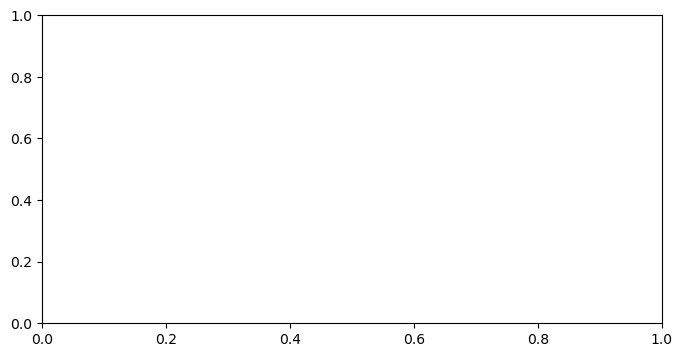

In [30]:
import pandas as pd
import numpy as np
import scipy.signal
import glob
import matplotlib.pyplot as plt

def func_periodogram(file):
    '''Function to calculate the periodic power of the terminus ablation time series'''
    time_series = pd.read_csv(file)
    ta = time_series.term_abl_year  # Get the values as a NumPy array

    # Calculate the periodogram using scipy's periodogram function
    frequencies, periodogram_values = scipy.signal.periodogram(ta)
    return frequencies, periodogram_values

latitude = None
longitude = None
glaciers = pd.read_csv('/Users/amankc/Library/CloudStorage/GoogleDrive-amankc929@gmail.com/My Drive/Terminus/Glacier_Data/Glacier_names.csv')
period_df = pd.DataFrame(columns=['glacier','region','frequency','periodogram_values','lat','lon'])
add_path = 'Results/Output/Term_Ablation_Latest/'
directory_path2 = root_path + add_path
file_pattern2 = 'Term_Ablation_latest_updated_*' +'*.csv' 
# Use glob to find files matching the pattern in the directory
matching_file = glob.glob(directory_path2 + file_pattern2)
fig, ax = plt.subplots(figsize=(8, 4))

for file in matching_file:
    glac_name = file[97:-7]
    for i in range(len(glaciers)):
        if glac_name == glaciers.Official_n[i]:
            latitude = glaciers.LAT[i]
            longitude = glaciers.LON[i]
    
    frequencies, periodogram_values = func_periodogram(file)
    
    # Sort the periodogram values in descending order and get the indices
    sorted_indices = np.argsort(periodogram_values)[::-1]
    
    # Get the highest and second highest frequencies
    max_index = sorted_indices[0]
    second_max_index = sorted_indices[1]
    
    max_freq = 1 / frequencies[max_index]
    second_max_freq = 1 / frequencies[second_max_index]
    
    # Classification based on second highest frequency
    if 10 < second_max_freq < 13 or 5.5 < second_max_freq < 6.5:
        cycle = 'C'
        annual = 'N'
    elif second_max_freq < 9:
        cycle = 'E'
        annual = 'N'
    else:
        annual = 'Y'
        if second_max_freq < 9:
            cycle = 'E'
        elif 9 < second_max_freq < 13:
            cycle = 'C'
    
    new_row = pd.DataFrame({
        'glacier': [file[97:-7]],
        'region': [file[-6:-4]],
        'frequency': [second_max_freq],
        'lat': [latitude],  # Add latitude value if available
        'lon': [longitude],  # Add longitude value if available
        'seasonality': [cycle],
        'long-term interannual': [annual]
    })
    
    period_df = pd.concat([period_df, new_row], ignore_index=True)

# Save or further process the period_df as needed
period_df.to_csv('periodogram_classification.csv', index=False)
period_df

In [ ]:
from shapely.geometry import Point

# combine lat and lon column to a shapely Point() object
period_df['geometry'] = period_df.apply(lambda x: Point((float(x.lon), float(x.lat))), axis=1)
shp_df = gpd.GeoDataFrame(period_df, geometry='geometry')
shp_df.to_file('/Users/amankc/Terminus_Ablation/Results/Test/Types/Glacier_types.shp', driver='ESRI Shapefile')

In [ ]:
def second_largest_index(arr):
    # Create a copy of the array to avoid modifying the original array
    sorted_arr = arr.copy()

    # Sort the array in ascending order
    sorted_arr.sort()

    # Get the index of the second largest number in the original array
    second_largest = sorted_arr[-2]
    second_largest_index = arr.index(second_largest)

    return second_largest_index

# Example array
my_array = [10, 5, 8, 20, 15]

# Find the index of the second largest number
result_index = second_largest_index(my_array)
print("Index of the second largest number:", result_index)



In [ ]:
row_list

In [ ]:
# Read the shapefile
glacier_name = 'Saqqarliup_Sermia'
glacier_id = 'SQS'
region = 'CW'
root_path = '/Users/amankc/Terminus_Ablation/'
path_to_shapefile = root_path +  glacier_name + '/Terminus_Positions/' + 'Filtered_Termini_' + glacier_name + '.shp'
gdf_org = gpd.read_file(path_to_shapefile)
# to sort the file in ascending order
gdf_sorted = gdf_org.iloc[gdf_org['Date'].sort_values().index.values]
# It is not in EPSG 3413
#gdf = gdf_sorted.to_crs(epsg = 3413)
gdf=gdf_sorted;

gdf_date = gdf.Date;
updated_dates = []
for date_str in gdf_date:
    # Split the date string into its components
    year, month, day = date_str.split('-')
    
    # Check if the month and day are '00', and if so, update them to '01'
    if month == '00':
        month = '01'
    if day == '00':
        day = '01'
    
    # Recreate the updated date string
    updated_date_str = f"{year}-{month}-{day}"
    
    # Append the updated date string to the new list
    updated_dates.append(updated_date_str)
date_format = '%Y-%m-%d'
for i in range(len(updated_dates)):
    date_obj = datetime.datetime.strptime(updated_dates[i], date_format)
    if date_obj > datetime.datetime(2013, 1, 1):
        n = i;
        break


# adding header to the csv files
# Directly using pandas by supplying header list eliminates the first row
# So we have to create a new file with extra row at the top
import csv
#u_data = pd.read_csv('Kangilliup_Sermia(Rink).csv');
glacier_upstream = root_path + 'Results/Data/UpstreamBoundary/' + glacier_name + '.csv'
with open('upstream_data.csv', 'w', newline='') as out_f:
    writer = csv.writer(out_f)

    with open(glacier_upstream, newline='') as in_f:
        reader = csv.reader(in_f)

        # Read the first row
        first_row = next(reader)
        # Count the columns in first row; equivalent to your `for i in range(len(first_row)): ...`
        header = [i for i, _ in enumerate(first_row)]
        # or header = list(range(len(first_row)))


        # Write header and first row
        writer.writerow(header)
        writer.writerow(first_row)

        # Write rest of rows
        for row in reader:
            writer.writerow(row)

u_data = pd.read_csv('upstream_data.csv');
# adding header
headerList = ['x','y']

# converting data frame to csv
u_data.to_csv("up_data.csv", header=headerList, index=False)

# display modified csv file
ups_data = pd.read_csv("up_data.csv")

## divide the whole shapefile and upstream boundary every 100
import math
dist = math.sqrt((ups_data.x[1]-ups_data.x[0])**2 + (ups_data.y[1]-ups_data.y[0])**2)
num_points = round(dist/50)


# Define the two coordinates
point1 = [ups_data.x[0], ups_data.y[0]]
point2 = [ups_data.x[1], ups_data.y[1]]

# Generate equally spaced points between the two coordinates
points = np.linspace(point1, point2, num_points)

# Print the resulting points
points_x = []
points_y = []
aa = 0;
for point in points:
    x = points[aa][0]  # x coordinate
    y = points[aa][1]# y coordinate
    points_x.append(x)
    points_y.append(y)
    aa +=1;

#Get n number of points for every terminus
import shapefile
from shapely.geometry import shape, LineString

# Load the shapefile
gdf.to_file('output_shapefile.shp', driver='ESRI Shapefile')
sf = shapefile.Reader('output_shapefile.shp')

# Get the first shape (assuming it contains the line)
line_points_list = []
for shape_record in sf.shapeRecords():
  line_geometry = shape_record.shape.__geo_interface__
#__geo_interface__ attribute is a standardized way to access the geometry of a Shapely object.
# It returns a dictionary that represents the geometry in a GeoJSON-like format.

  # Convert the line geometry to a Shapely LineString
  line = LineString(line_geometry['coordinates'])

  # Divide the line into equal number of points
  points = [line.interpolate(i / (num_points - 1), normalized=True) for i in range(num_points)]
  #line_points[shape_record.record[0]] = points
  # Save the resulting points
  b=0;
  x_coords = [point.x for point in points]
  y_coords = [point.y for point in points]
  line_points_list.append((x_coords, y_coords))
  b+=1;

# Also check if the shapefiles are started from the same point
# Add a line plot connecting the points
# Look comments below before running this
points_x2 = [];
points_y2 = [];
# for points in points_x:
#   points_x2.append(points);
# for points in points_y:
#   points_y2.append(points);
for points in points_x:
 points_x2.append(points+1000);
for points in points_y:
 points_y2.append(points-1000);
plt.scatter(points_x2,points_y2)
plt.plot(line_points_list[0][0],line_points_list[0][1])
plt.plot(line_points_list[-1][0],line_points_list[-1][1])

dis = [];
dateTer = [];
for z in range(len(line_points_list)-n):
    d = [];
    for x in range(len(points_x)):
        xd = (line_points_list[z+n][0][x] - points_x2[x])**2 
        yd = (line_points_list[z+n][1][x] - points_y2[x])**2
        d.append(math.sqrt(xd+yd))
    dis.append(np.average(d)/1000)
    dateTer.append(gdf_date[z+n])
a = [];
for date in dateTer:
    a.append(datetime.datetime.strptime(date, date_format))
plt.plot(dis,color = '#331067')

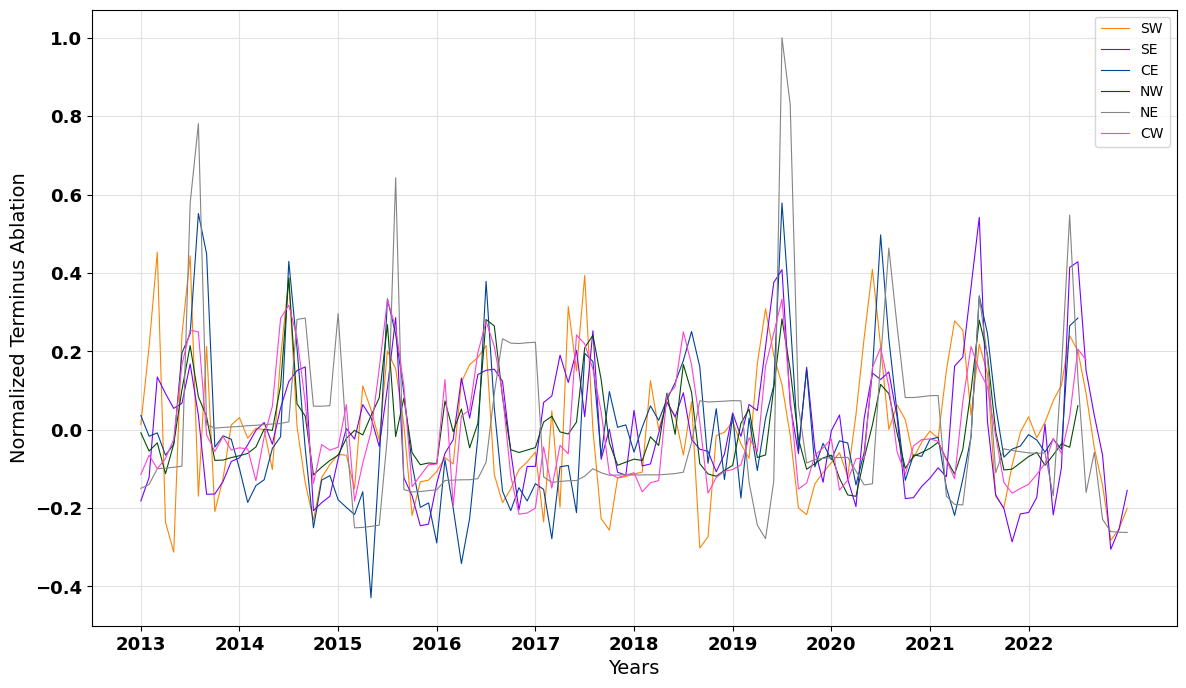

In [275]:
#plotting all the normalized time series
# Run this after getting the data for all the regions
region_color = { 'CE' : '#014496', 'SE' : '#7900FF', 'SW' :'#FF8403', 'CW' : '#ff41d6', 'NW' : '#014E05', 'NE' : '#848484'}
regions_name = ['CE','SE','SW','CW','NW','NE']
normalized_path = root_path + 'Results/Output/Normalized_Terminus_Ablation/'
file_pattern2 = '*Normalized_Time_series_for_*.csv'  # Replace this with your desired file pattern
# Use glob to find files matching the pattern in the directory
matching_files2 = glob.glob(normalized_path + file_pattern2)
legend_labels = [];
plt.figure(figsize=(14,8))         
for file in matching_files2:
    for regions in regions_name:
        if regions in file:
            read_file = pd.read_csv(file)
            date_axis = read_file.date
            norm_abl = read_file.normalized_term_abl
            plt.plot(date_axis,norm_abl, color = region_color[regions],linewidth = 0.8)
            legend_labels.append(regions)

plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized Terminus Ablation',fontsize = 14)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;
interval = 12;
dates_ticks = [];
dates_label = [];
for date in date_axis:
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])
    xz+=1
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold')
plt.yticks(fontsize = 13,weight='bold')
plt.legend(legend_labels,loc = 'best')
plt.grid('on',color = '#E4E1E1')
plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for_Greenland '+'.png',dpi=300)

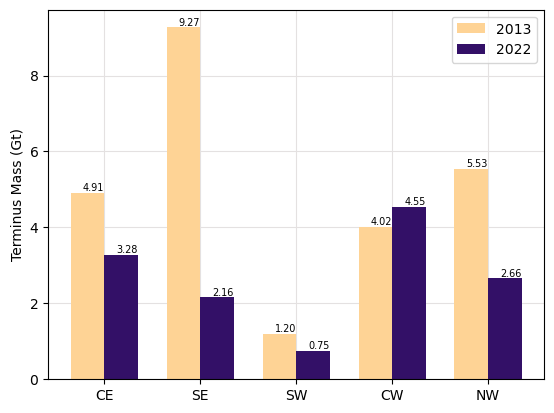

In [32]:
#This section returns the mean of the mass near the terminus for the year 2013 and 2023

import glob
import datetime
directory_path = root_path + 'Results/Output/'
regions_name = ['CE','SE','SW','CW','NW']
color_13 = '#fed395'
color_22 = '#331067'
sum_mass1 = [];sum_mass2 = [];
date_axis = [];
l = [];
# for i in range(len(csv_file)):
#     l.append(len(csv_file[i]));len_max = np.min(l)
# min_idx = pd.Series(l).idxmin()
    

d1 = datetime.datetime(2013, 1, 1)
d2 = datetime.datetime(2013, 12, 31)
d3 = datetime.datetime(2022, 1, 1)
d4 = datetime.datetime(2022, 12, 31)

for region in regions_name:
    data1 = []; data2 = [];
    counter1 = 0; counter2 = 0;
    file_pattern = 'Term_Mass_Error*_' + region +'*.csv'  # Replace this with your desired file pattern
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file = pd.read_csv(file)
        for j in range(len(csv_file)):     
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d1 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d2:
                data1.append(csv_file.terminus_mass[j])
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d3 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d4:
                data2.append(csv_file.terminus_mass[j])
    
    sum_mass1.append(np.mean(data1))
    sum_mass2.append(np.mean(data2))

x = np.arange(len(regions_name))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_mass1, width,color = color_13)
rects2 = ax.bar(x + width/2, sum_mass2, width, color = color_22)
ax.set_ylabel('Terminus Mass (Gt)')
plt.grid('on',color = '#E4E1E1')
ax.set_axisbelow(True)
for i, value in enumerate(sum_mass1):
    plt.text(i, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
for i, value in enumerate(sum_mass2):
    plt.text(i + width, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
le = [0,1,2,3,4]
legend_labels = ['2013','2022']
plt.legend(legend_labels,loc = 'best')
plt.xticks(le,regions_name)

plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Mass_Change_Greenland '+'.png',dpi=300)
plt.show()
# df = pd.DataFrame(data, columns=['Numbers'])

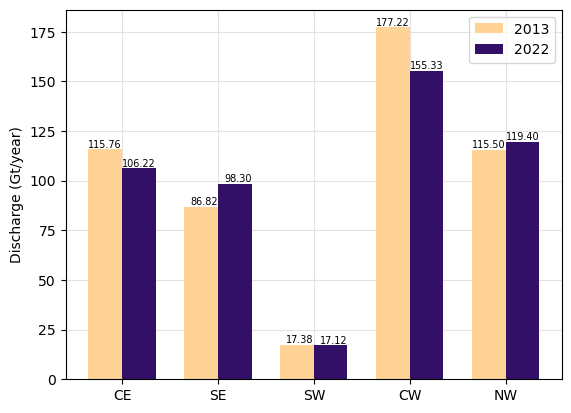

In [31]:
#This section returns the mean of the mass near the terminus for the year 2013 and 2023

import glob
import datetime
directory_path = root_path + 'Results/Output/Term_Ablation_latest/'
regions_name = ['CE','SE','SW','CW','NW']
color_13 = '#fed395'
color_22 = '#331067'
sum_mass1 = [];sum_mass2 = [];
sum_mass3 = [];sum_mass4 = [];
date_axis = [];
l = [];
# for i in range(len(csv_file)):
#     l.append(len(csv_file[i]));len_max = np.min(l)
# min_idx = pd.Series(l).idxmin()
d1 = datetime.datetime(2013, 1, 1)
d2 = datetime.datetime(2013, 12, 31)
d3 = datetime.datetime(2022, 1, 1)
d4 = datetime.datetime(2022, 12, 31)

for region in regions_name:
    data1 = []; data2 = [];
    data3 = []; data4 = [];
    counter1 = 0; counter2 = 0;
    file_pattern = 'Term_Ablation*_' + region +'*.csv'  # Replace this with your desired file pattern
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file = pd.read_csv(file)
        for j in range(len(csv_file)-1):     
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d1 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d2:
                data1.append(csv_file.discharge[j]/12)
                data3.append(csv_file.term_abl_year[j]/12)
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d3 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d4:
                data2.append(csv_file.discharge[j]/12)
                data4.append(csv_file.term_abl_year[j]/12)

    sum_mass1.append(np.sum(data1))
    sum_mass2.append(np.sum(data2))
    
    sum_mass3.append(np.sum(data3))
    sum_mass4.append(np.sum(data4))

x = np.arange(len(regions_name))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_mass1, width,color = color_13)
rects2 = ax.bar(x + width/2, sum_mass2, width, color = color_22)
ax.set_ylabel('Discharge (Gt/year)')
plt.grid('on',color = '#E4E1E1')
ax.set_axisbelow(True)
for i, value in enumerate(sum_mass1):
    plt.text(i, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
for i, value in enumerate(sum_mass2):
    plt.text(i + width, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
le = [0,1,2,3,4]
legend_labels = ['2013','2022']
plt.legend(legend_labels,loc = 'best')
plt.xticks(le,regions_name)

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Term_Abl_Change_Greenland '+'.png',dpi=300)
plt.show()
# df = pd.DataFrame(data, columns=['Numbers'])

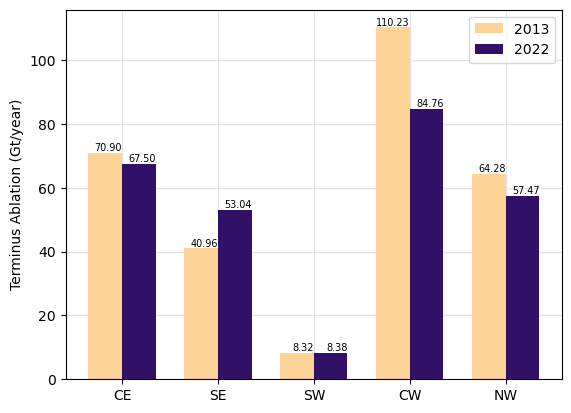

In [69]:
x = np.arange(len(regions_name))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_mass3, width,color = color_13)
rects2 = ax.bar(x + width/2, sum_mass4, width, color = color_22)
ax.set_ylabel('Terminus Ablation (Gt/year)')
plt.grid('on',color = '#E4E1E1')
ax.set_axisbelow(True)
for i, value in enumerate(sum_mass3):
    plt.text(i, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
for i, value in enumerate(sum_mass4):
    plt.text(i + width, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
le = [0,1,2,3,4]
legend_labels = ['2013','2022']
plt.legend(legend_labels,loc = 'best')
plt.xticks(le,regions_name)

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Term_Abl_Change_Greenland '+'.png',dpi=300)
plt.show()

In [140]:
#This section returns the mean of the mass near the terminus for the year 2013 and 2023

import glob
import datetime
directory_path = root_path + 'Results/Output/Term_Ablation_latest/'
regions_name = ['CE','SE','SW','CW','NW']
color_13 = '#fed395'
color_22 = '#331067'
sum_mass1 = [];sum_mass2 = [];
sum_mass3 = [];sum_mass4 = [];
date_axis = [];
l = [];
# for i in range(len(csv_file)):
#     l.append(len(csv_file[i]));len_max = np.min(l)
# min_idx = pd.Series(l).idxmin()
interval = 12;
df2 = [];
for region in regions_name:
    data1 = []; data2 = [];
    data3 = []; data4 = [];
    counter1 = 0; counter2 = 0;
    file_pattern = 'Term_Ablation*_' + region +'*.csv'  # Replace this with your desired file pattern
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    # csv_file = [];
    # for file in matching_files:
    csvs_df = pd.DataFrame()
    for i, file in enumerate(matching_files):
        df = pd.read_csv(file)
        df['site_number'] = i
        csvs_df = pd.concat([csvs_df, df])
    csvs_df.reset_index(drop=True, inplace=True)
    # convert dates to pandas.datetime
    csvs_df['dates'] = pd.to_datetime(csvs_df['dates'])
    
    # grab unique dates
    unique_dates = csvs_df['dates'].drop_duplicates()
    csvs_df['year'] = csvs_df['dates'].dt.year
    # Group by the 'year' column and sum the values for each year
    discharge_sum = (csvs_df.groupby('year').discharge.sum())/12
    term_abl_sum = (csvs_df.groupby('year').term_abl_year.sum())/12
    region_df = pd.DataFrame({
        'region': [region] * len(discharge_sum),
        'year': discharge_sum.index,
        'discharge': discharge_sum.values,
        'term_abl': term_abl_sum.values
    })
    region_df.to_csv(root_path + 'Results/Output/'+'Total_ablation_' + region + '.csv')
    # df2.append(region_df)

    

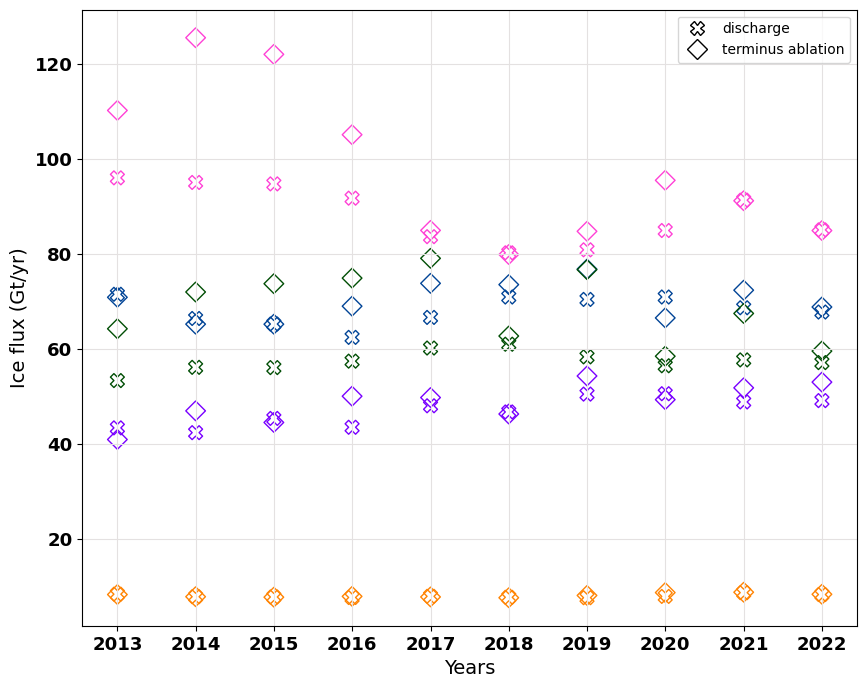

In [33]:
from matplotlib.lines import Line2D
region_color = { 'CE' : '#014496', 'SE' : '#7900FF', 'SW' :'#FF8403', 'CW' : '#ff41d6', 'NW' : '#014E05', 'NE' : '#848484'}
regions_name = ['CE','SE','SW','CW','NW','NE']
total_path = root_path + 'Results/Output/'
file_pattern = '*Total_ablation_*.csv'  # Replace this with your desired file pattern
# Use glob to find files matching the pattern in the directory
matching_files = glob.glob(total_path + file_pattern)
# fig,ax = plt.subplots(2,1)
legend_labels = [];
plt.figure(figsize = [10,8])
for file in matching_files:
    for regions in regions_name:
        if regions in file:
            read_file = pd.read_csv(file)
            date_x = [];
            date_axis = read_file.year
            for i in range(len(date_axis)):
                date_x.append(pd.to_datetime(date_axis[i].astype(str)))
            tot_abl = read_file.term_abl
            tot_dis = read_file.discharge
            # plt.xlim(np.datetime64('2012'), np.datetime64('2023'))
            # plt.scatter(date_x[:-1],tot_dis[:-1], color = region_color[regions],linewidth = 0.8,marker='^',edgecolor='black',s=50)
            plt.scatter(date_x[:-1],tot_dis[:-1], color = 'none',edgecolor = region_color[regions],linewidth =1,marker='X',s=100)
            # ax[0].set_xlim(np.datetime64('2013-01-01'), np.datetime64('2022-12-31'))
            # plt.scatter(date_x[:-1],tot_abl[:-1], color = region_color[regions],linewidth = 0.8,marker='s',edgecolor='black',s=50)
            plt.scatter(date_x[:-1],tot_abl[:-1], color = 'none',edgecolor = region_color[regions],linewidth = 1,marker='D',s=100)
            
            legend_labels.append(regions)
plt.xticks(fontsize = 13,weight='bold')
plt.yticks(fontsize = 13,weight='bold')
legend_elements = [
    Line2D([0], [0], marker='X', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='discharge'),
    Line2D([0], [0], marker='D', color='w', markerfacecolor='none', markeredgecolor='black', markersize=10, label='terminus ablation')
]
plt.legend(handles=legend_elements, loc='upper right')
# plt.legend(['discharge','terminus ablation'], face='red',loc = 'upper right')
plt.grid('on',color = '#E4E1E1') 
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Ice flux (Gt/yr)',fontsize = 14)
plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Term_Abl_Greenland_total '+'.png',dpi=300)
plt.show()


In [36]:
tot_dis

0     53.365910
1     56.151948
2     56.098039
3     57.454522
4     60.216343
5     61.021260
6     58.356881
7     56.486305
8     57.717270
9     57.153121
10     5.453455
Name: discharge, dtype: float64

In [429]:
# mean_term_abl_normalized

In [ ]:
#This section returns the mean of the mass near the terminus for the year 2013 and 2023

import glob
import datetime
directory_path = root_path + 'Results/Output/'
regions_name = ['CE','SE','SW','CW','NW']
color_13 = '#fed395'
color_22 = '#331067'
sum_mass1 = [];sum_mass2 = [];
date_axis = [];
l = [];
# for i in range(len(csv_file)):
#     l.append(len(csv_file[i]));len_max = np.min(l)
# min_idx = pd.Series(l).idxmin()
    

d1 = datetime.datetime(2013, 1, 1)
d2 = datetime.datetime(2013, 12, 31)
d3 = datetime.datetime(2022, 1, 1)
d4 = datetime.datetime(2022, 12, 31)

for region in regions_name:
    data1 = []; data2 = [];
    counter1 = 0; counter2 = 0;
    file_pattern = 'Term_Mass_Error*_' + region +'*.csv'  # Replace this with your desired file pattern
    # Use glob to find files matching the pattern in the directory
    matching_files = glob.glob(directory_path + file_pattern)
    csv_file = [];
    for file in matching_files:
        csv_file = pd.read_csv(file)
        for j in range(len(csv_file)):     
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d1 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d2:
                data1.append(csv_file.terminus_mass[j])
            if datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')>= d3 and datetime.datetime.strptime(csv_file.dates[j],'%d-%b-%Y')<=d4:
                data2.append(csv_file.terminus_mass[j])
    
    sum_mass1.append(np.mean(data1))
    sum_mass2.append(np.mean(data2))

x = np.arange(len(regions_name))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sum_mass1, width,color = color_13)
rects2 = ax.bar(x + width/2, sum_mass2, width, color = color_22)
ax.set_ylabel('Terminus Mass (Gt)')
plt.grid('on',color = '#E4E1E1')
ax.set_axisbelow(True)
for i, value in enumerate(sum_mass1):
    plt.text(i, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
for i, value in enumerate(sum_mass2):
    plt.text(i + width, value, f'{value:.2f}', ha='right', va='bottom', fontsize=7)
le = [0,1,2,3,4]
legend_labels = ['2013','2022']
plt.legend(legend_labels,loc = 'best')
plt.xticks(le,regions_name)

plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Mass_Change_Greenland '+'.png',dpi=300)
plt.show()
# df = pd.DataFrame(data, columns=['Numbers'])

In [693]:
region = 'CW'
file_pattern = 'Term_Mass_Error*_' + region +'*.csv'
matching_files = glob.glob(directory_path + file_pattern)
matching_files
for file in matching_files:
        csv_file.append(pd.read_csv(file))
        for i in range(len(csv_file)):
            for j in range(len(csv_file[i])):     
                if datetime.datetime.strptime(csv_file[i].dates[j],'%d-%b-%Y')>= d1 and datetime.datetime.strptime(csv_file[i].dates[j],'%d-%b-%Y')<=d2:
                    data1.append(csv_file[i].terminus_mass[j])
                if datetime.datetime.strptime(csv_file[i].dates[j],'%d-%b-%Y')>= d3 and datetime.datetime.strptime(csv_file[i].dates[j],'%d-%b-%Y')<=d4:
                    data2.append(csv_file[i].terminus_mass[j])
    
sum_mass1.append(np.mean(data1))
sum_mass2.append(np.mean(data2))

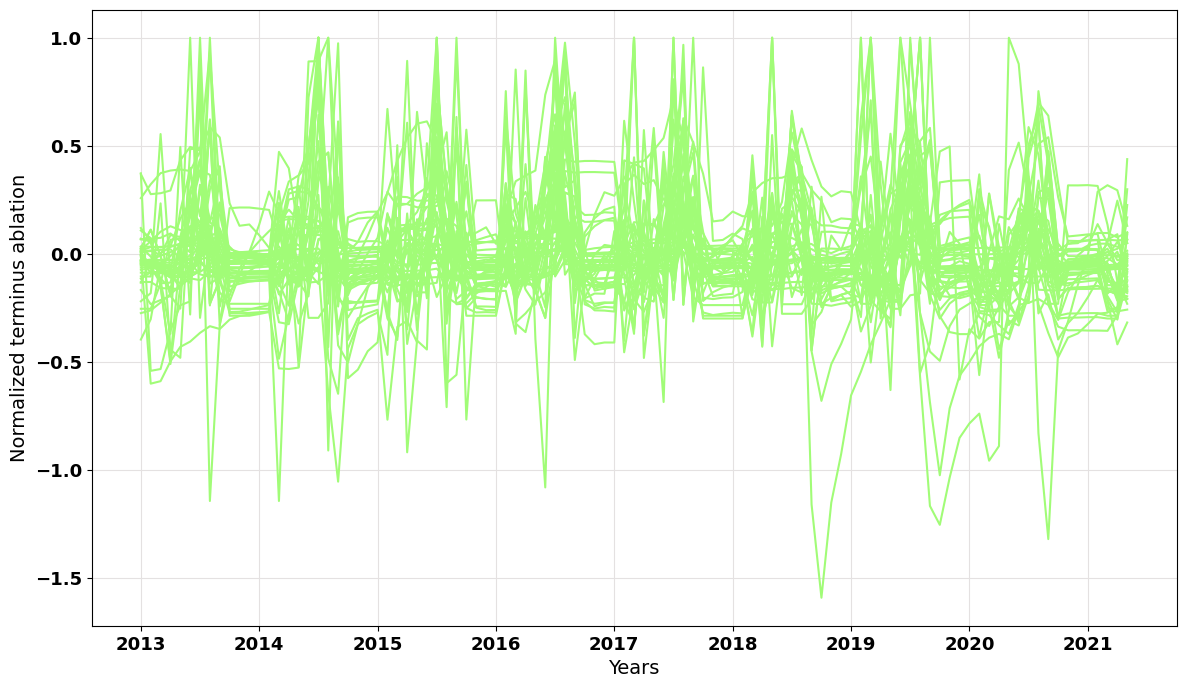

In [20]:
# Normailze the figure
term_ablation2_normalized = [];
discharge2_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge2_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append((csv_file[i].term_abl_year[j]-mean_value)/max_value)
        discharge2_normalized[i].append((csv_file[i].discharge[j]-mean_value)/max_value)
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized2 = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge2_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl/counter);
    mean_discharge_normalized2.append(discharge_sum/counter);
# fig,ax = plt.subplots()
plt.figure(figsize=(14,8)) 
# ax = plt.plot(term_ablation2_normalized[0], color = color_code1)
#ax = plt.plot(date_axis, term_ablation2[0], color = color_code1) # Run this with the X axis 
for i in range(len(term_ablation2_normalized)):
    plt.plot(date_axis,term_ablation2_normalized[i], color = color_code1)
plt.plot(date_axis,mean_term_abl_normalized,marker='*',color = color_code2)
plt.xlabel('Years',fontsize = 14)
plt.ylabel('Normalized terminus ablation',fontsize = 14)
# plt.title('Normalized Time series for ' + region)
# ticks_data = ['01-Jan-2013','01-Jan-2014','01-Jan-2015','01-Jan-2016','01-Jan-2017','01-Jan-2018','01-Jan-2019','01-Jan-2020','01-Jan-2021','01-Jan-2022','01-Jan-2023']
# plt.xticks(ticks_data,rotation=90)
xz = 0;
interval = 12;
dates_ticks = [];
dates_label = [];
for date in date_axis:
    if xz%interval == 0:
        dates_ticks.append(date)
        dates_label.append(date[7:])
    xz+=1
plt.xticks(dates_ticks,dates_label,fontsize = 13,weight='bold');
plt.yticks(fontsize = 13,weight='bold');
plt.grid('on',color = '#E4E1E1')
plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300)
# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')


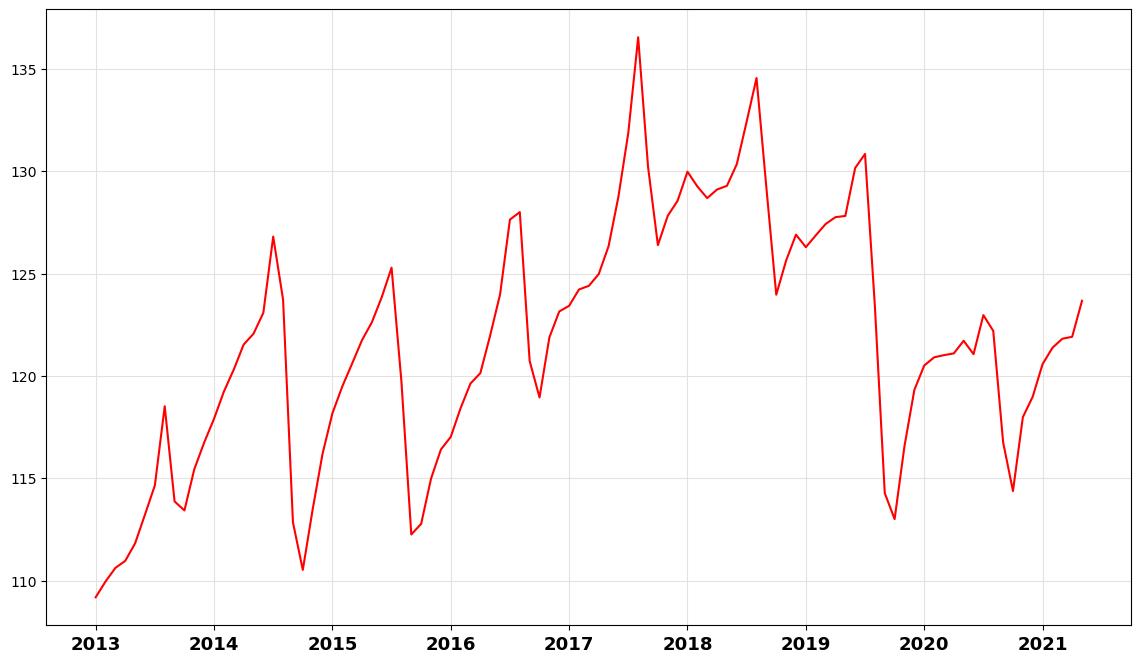

In [21]:
# Getting the total sum for both
term_ablation2_normalized = [];
discharge2_normalized = [];
for i in range(len(csv_file)):
    j = 0;
    term_ablation2_normalized.append([]) # Initialize an empty list for each index in term_ablation2
    discharge2_normalized.append([]);
    mean_value = np.mean(csv_file[i].term_abl_year)
    max_value = np.max(csv_file[i].term_abl_year-mean_value)

    mean_value_dis = np.mean(csv_file[i].discharge)
    max_value_dis = np.max(csv_file[i].discharge-mean_value_dis)
    for j in range(len_max):
    # range(len(csv_file[i].term_abl_year)):
        term_ablation2_normalized[i].append(csv_file[i].term_abl_year[j])
        discharge2_normalized[i].append(csv_file[i].discharge[j])
        # date_axis[i].append(csv_file[i].dates[j]);
        # date_axis[i] = csv_file[i].dates[j]
        j+=1;

mean_term_abl_normalized = [];
mean_discharge_normalized2 = [];
for i in range(len(term_ablation2_normalized[0])):
    counter = 0;
    sum_term_abl = 0; discharge_sum = 0;
    for j in range(len(term_ablation2)):
        sum_term_abl = sum_term_abl + term_ablation2_normalized[j][i]
        discharge_sum = discharge_sum +  discharge2_normalized[j][i]
        counter += 1;
    mean_term_abl_normalized.append(sum_term_abl);
    mean_discharge_normalized2.append(discharge_sum);

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_Time_series_for ' + region +'.png',dpi=300,bbox_inches='tight', pad_inches=0)
columns = {'date': date_axis,'normalized_term_abl': mean_term_abl_normalized,'normalized_discharge':mean_discharge_normalized}
mean_df = pd.DataFrame(data=columns)
# mean_df.to_csv(root_path + 'Results/Output/Normalized_Terminus_Ablation/'+'Normalized_Time_series_for_' + region + '.csv')

term_abl_color = color_code2
discharge_color = '#ff0000ff'
plt.figure(figsize=(14,8)) 

plt.plot(date_axis,mean_term_abl_normalized, color = term_abl_color)
plt.plot(date_axis,mean_discharge_normalized2, color = discharge_color)
# plt.xlabel('Years',fontsize = 14)
# plt.ylabel('Normalized flux',fontsize = 14)
# plt.legend(['Normalized terminus ablation','Normalized discharge'],loc = 'best')
dates_ticks2 = dates_ticks;
if len(dates_ticks) == 10:
    dates_ticks2.append('17-Jan-2023')
    dates_label.append('2023')                     
plt.xticks(dates_ticks2,dates_label,fontsize = 13,weight = 'bold')
# plt.yticks(fontsize = 13,weight = 'bold')
plt.grid('on',color = '#E4E1E1')
ax = plt.gca()
# ax.set_ylim([-0.5, 1])

# plt.savefig(root_path + 'Results/Images/Regional_Figures/'+'Normalized_by_ablation_test ' + region +'.png',dpi=300)

/var/folders/kn/6f5gmt395k751v7ndm_mzq180000gq/T/ipykernel_87775/3957147556.py:5: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=115).
  frequencies, times, Sxx = plt.specgram(months, NFFT=256, Fs=1, noverlap=128)


ValueError: too many values to unpack (expected 3)

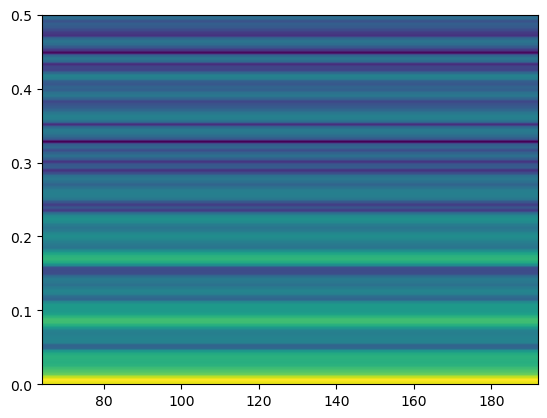

In [459]:
# mean_discharge_normalized2

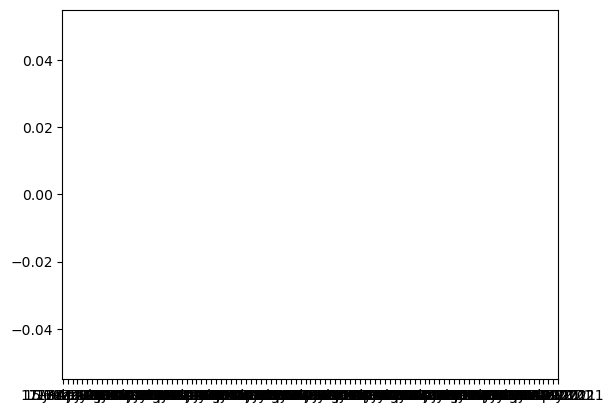

In [22]:
plt.plot(date_axis,mean_term_abl, color = color_code2)
plt.xticks(date_axis)
plt.show()

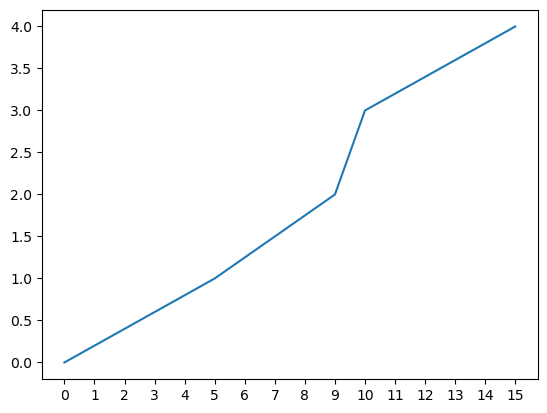

In [1068]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

In [1064]:
min(date_axis)

'15-Feb-2013'

In [1065]:
max(date_axis)

'17-Oct-2021'

In [63]:
# date_axis

In [64]:
#seaborn
add manually: if it changed more than x% --> long term varaibility